In [3]:
import numpy as np
import pandas as pd

from scipy.io import mmread

import seaborn as sns

from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
from sklearn import metrics

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score

In [5]:
import os
print(os.getcwd());os.chdir('/data01/ch6845/MarcoPolo/')
print(os.getcwd())

/data01/ch6845/MarcoPolo/experiments
/data01/ch6845/MarcoPolo


In [6]:
from matplotlib import font_manager

def font_prop(bold=False,**kwargs):
    if bold==True:
        path='/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/arialbd.ttf'
    else:
        path='/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'
    fontproperties=font_manager.FontProperties(fname=path,
                                                   **kwargs)
    return fontproperties

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import colors
from cycler import cycler

# specify the custom font to use
#https://www.freefontspro.com/14454/arial.ttf
#/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#https://color.adobe.com/ko/create/image

plt.rcParams["font.size"] = 18

font_fname = '/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

print(font_family)
#https://matplotlib.org/users/dflt_style_changes.html
color_seq_2_grey=['#999999',
                '#4D4D4D']
color_seq_2_pink=['#F5C2A7',
                '#F53345']

color_qual_2=['#0DD9C4','#F27E63']
"""
color_qual_5=['#F26D6D'
            '#83A603',
            '#04BFBF',
            '#8659B3',
            '#BD8A44']
"""
color_qual_6=['#F53345',
            '#87D303',
            '#04CBCC',
            '#8650CD',
            '#F5A637',              
            '#DBD783']


color_qual_7=['#F53345',
            '#87D303',
            '#04CBCC',
            '#8650CD',
            (160/256, 95/256, 0),
            '#F5A637',              
            '#DBD783',
            
             ]

#

color_qual_3=['#F7766F',
             '#05BC39',
             '#609FFC']
color_qual_3=[np.array(colors.to_rgb(c)) for c in color_qual_3]
color_qual_3_two=[color_qual_3[0],1.2*color_qual_3[0],
                  color_qual_3[1],1.2*color_qual_3[1],
                  color_qual_3[2],1.2*color_qual_3[1]]
color_qual_3_two=np.clip(color_qual_3_two,a_max=1,a_min=0)

plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.edgecolor']='1.0'
plt.rcParams['legend.framealpha']=0

Arial


In [8]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [9]:
dataset_name_all=[
'Kohinbulk_filtered',
'HumanLiver_filtered',
'Zhengmix8eq_filtered'  
]

In [10]:
def dataset_name_mapper(dataset_name):
    if 'Koh' in dataset_name:
        return 'hESC'
    elif 'Liver' in dataset_name:
        return 'Liver'
    elif 'Zheng' in dataset_name:
        return 'PBMC'
    else:
        return dataset_name

In [11]:
def celltype_mapper(celltype,short=False):
    celltype_dict={
    'b.cells':'B cells',
    'regulatory.t':'Regulatory T cells',
    'memory.t':'Memory T cells',
    'naive.cytotoxic':'Naive cytotoxic',
    'cd4.t.helper':'Helper T cells',    
    'naive.t':'Naive T cells',    
    'cd14.monocytes':'Monocytes',    
    'cd56.nk':'NK cells',
                   
    'hESC':'hESC',
    'APS':'Ant. primitive streak',
    'MPS':'Mid. primitive streak',
    'DLL1pPXM':'Paraxial mesoderm',
    'ESMT':'Early somite',
    'Sclrtm':'Sclerotome',                   
    'D5CntrlDrmmtm':'Central dermomyotome',
    'D2LtM':'Lateral mesoderm',  
        
    'LSECs':'LSECs',
    'Cholangiocytes':'Cholangiocytes',        
    'Macrophages':'Macrophages',        
    'ab T cells':'ab T cells',        
    'NK cells':'NK cells',        
    'gd T cells':'gd T cells',        
    'Hepatocytes':'Hepatocytes',        
    'Mature B cells':'Mature B cells',        
    'Hepatic Stellate Cells':'Hepatic stellate cells',        
    'Plasma cells':'Plasma cells',                
    'Erythroid cells':'Erythroid cells',                        
}
    celltype_dict_short={
    'b.cells':'B cells',
    'regulatory.t':'Regulatory T cells',
    'memory.t':'Memory T cells',
    'naive.cytotoxic':'Naive cytotoxic',
    'cd4.t.helper':'Helper T cells',    
    'naive.t':'Naive T cells',    
    'cd14.monocytes':'Monocytes',    
    'cd56.nk':'NK cells',
                   
    'hESC':'hESC',
    'APS':'APS',
    'MPS':'MPS',
    'DLL1pPXM':'Paraxial mesoderm',
    'ESMT':'Early somite',
    'Sclrtm':'Sclerotome',                   
    'D5CntrlDrmmtm':'Central dermomyotome',
    'D2LtM':'Lateral mesoderm',  
        
    'LSECs':'LSECs',
    'Cholangiocytes':'Cholangiocytes',        
    'Macrophages':'Macrophages',        
    'ab T cells':'ab T cells',        
    'NK cells':'NK cells',        
    'gd T cells':'gd T cells',        
    'Hepatocytes':'Hepatocytes',        
    'Mature B cells':'Mature B cells',        
    'Hepatic Stellate Cells':'Hepatic stellate cells',        
    'Plasma cells':'Plasma cells',                
    'Erythroid cells':'Erythroid cells',                        
}    
    if short:
        if celltype in celltype_dict_short.keys():
            return celltype_dict_short[celltype]
        else:
            return celltype        
    else:
        if celltype in celltype_dict.keys():
            return celltype_dict[celltype]
        else:
            return celltype
        
celltype_mapper(exp_data_meta_transformed_sub['phenoid'][0],True)        

NameError: name 'exp_data_meta_transformed_sub' is not defined

In [12]:
def method_mapper(method):
    if method=='MarcoPolo':
        return 'MarcoPolo'
    if method=='vst':
        return 'HVG (VST)'
    elif method=='disp':
        return 'HVG (DISP)'
    elif 'seurat' in method:
        if '0_5' in method:
            return 'Seurat (res=0.5)'
        elif '1_0' in method:
            return 'Seurat (res=1.0)'
        elif '1_5' in method:
            return 'Seurat (res=1.5)'        
        else:
            raise RuntimeError(method)
    elif 'ht' in method:
        if 'tsne' in method:
            return 'Haystack (tSNE)'
        if 'pca' in method:
            return 'Haystack'
        else:
            raise RuntimeError(method)        
    else:
        raise RuntimeError(method)

In [13]:
def load_deg(dataset_name='HumanLiver_filtered',res_str='0_5'):
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
        
    deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,res_str),sep='\t',index_col=0)
    deg_result['avg_logFC_abs']=-np.abs(deg_result['avg_logFC'])
    
    deg_result_sorted=deg_result.sort_values(['p_val','avg_logFC_abs'])
    
    top_gene=deg_result_sorted['gene'].astype(str).values
    _,idx=np.unique(top_gene,return_index=True)
    top_gene_unique=top_gene[np.sort(idx)]
    
    #print(top_gene_unique,exp_data_row)
    
    assert set(top_gene_unique).issubset(exp_data_row)  
    
    return top_gene_unique

In [14]:
def load_score(dataset_name,method='MarcoPolo'):
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    if method=='MarcoPolo':
        allscore=pd.read_csv('datasets/extract/{}.MarcoPolo.{}.rank.tsv'.format(dataset_name,2),sep='\t',index_col=0)
        #print(allscore)
        score=-allscore['MarcoPolo'].values
        
    elif method in ['vst','mvp','disp','ht.tsne','ht.pca']:
        hvg_result=pd.read_csv('datasets/extract/{}.hvg.{}.tsv'.format(dataset_name,method),sep='\t',index_col=0)
        hvg_result.index=hvg_result.index.astype(str)
        
        if hvg_result.shape[1]==0:
            #print(method,'no sorting')
            pass
        elif hvg_result.shape[1]==1:
            #print(method,'sorting x')
            hvg_result=hvg_result.sort_values(by='x',ascending=False)
        else:
            #print(method,'no sorting')
            pass
        score=-np.array(list(map(lambda x: hvg_result.index.tolist().index(x) if x in hvg_result.index else len(hvg_result.index), exp_data_row)))

    elif 'seurat' in method:
        resolution=method.split(',')[1]

        deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
        score=-np.array(list(map(lambda x: deg_result.tolist().index(x) if x in deg_result else len(deg_result), exp_data_row)))        
        
        #seurat_maxdiff=pd.read_csv('datasets/extract/{}.clustering.{}.label.maxdiff.tsv'.format(dataset_name,resolution),sep='\t',header=None)
        #seurat_markerrho=exp_data_pertype_onehot.astype(int)[marker_maxdiff].to_csv('datasets/extract/{}.clusterlabel.{}.markerrho.tsv'.format(dataset_name,resolution),sep='\t')
        #print(seurat_maxdiff)
        #score=seurat_maxdiff[1].values
    else:
        raise
    
    assert len(exp_data_row)==len(score)   
    return score

In [15]:
def load_marker(dataset_name,method='cellmarker',type_list=None):
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    if method=='cellmarker':
        marker=pd.read_csv('datasets/extract/{}.markerdb.CellMarker.tsv'.format(dataset_name),sep='\t',index_col=0,header=None)
    elif method=='truelabel_maxdiff':
        markerrho=pd.read_csv('datasets/extract/{}.markerrho.tsv'.format(dataset_name),index_col=0,sep='\t')
    else:
        raise
        
    if type_list is not None:
        #pass
        markerrho=markerrho.loc[type_list]
        markerrho=markerrho.iloc[:,(markerrho.sum(axis=0)!=0).values]
        markerrho=markerrho.iloc[:,(markerrho.sum(axis=0)!=markerrho.shape[0]).values]
    #print(markerrho)
    if method=='cellmarker':
        marker=marker[1].values
    elif method=='truelabel_maxdiff':
        marker=markerrho.columns.values
    else:
        raise        
        
    
    assert np.all(list(map(lambda x: x in exp_data_row, marker)))
        
    return marker

In [16]:
from Bio import Phylo

In [17]:
tree = Phylo.read("tree_sameend.txt", "newick")

In [18]:
fig_sub1.set_xlim?

Object `fig_sub1.set_xlim` not found.


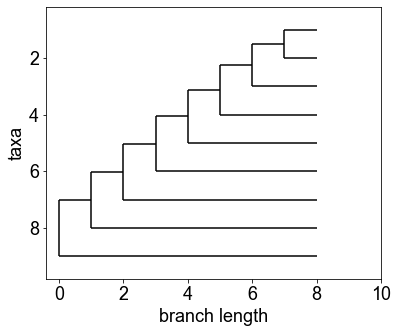

Text(25.200000000000003, 0.5, 'False positive rate')

In [19]:
#import pylab
fig = plt.figure(figsize=(6, 5)) 
fig_sub1=fig.add_subplot()



Phylo.draw(tree,axes=fig_sub1,label_func=lambda x: '')
#pylab.axis('off')

fig_sub1.set_ylabel('False positive rate')

#fig_sub1.set_xlim(0,1)
#fig_sub1.spines['top'].set_visible(False)
#plt.show()

In [20]:
fig.savefig('pub/tree.png', bbox_inches='tight')
fig.savefig('pub/tree.jpg', bbox_inches='tight')
fig.savefig('pub/tree.svg', bbox_inches='tight')

# Simul

Simul_1_1e-2_1_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_2_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_3_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_4_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_5_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_6_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_7_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_8_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_9_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-2_10_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_5e-3_1_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_5e-3_2_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Sim

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_2_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_3_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_4_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_5_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_6_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_7_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_8_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_9_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_1e-3_10_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_5e-4_1_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_5e-4_2_filtered
MarcoPolo
vst
disp
ht.pca
seurat,0_5
seurat,1_0
seurat,1_5
Simul_1_5e-4_3_filtered
MarcoPolo
vst

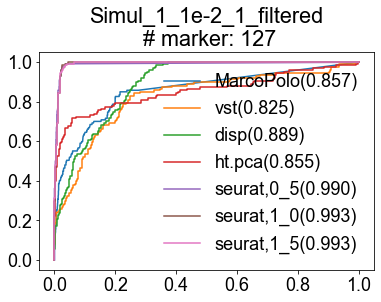

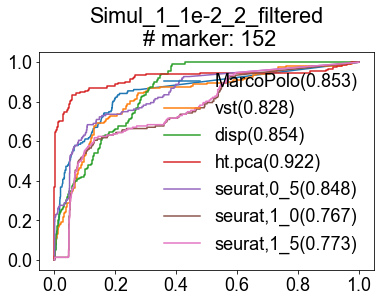

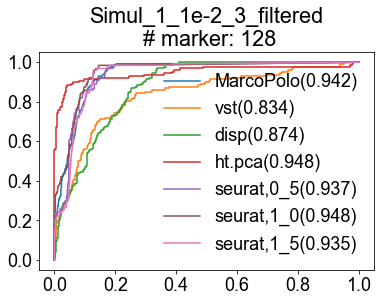

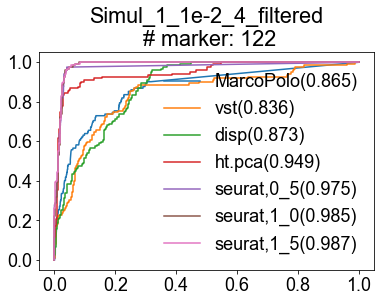

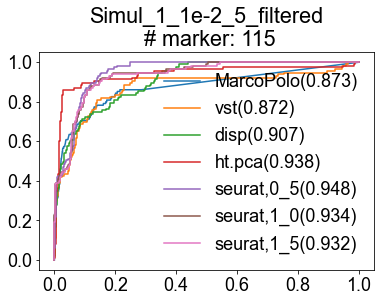

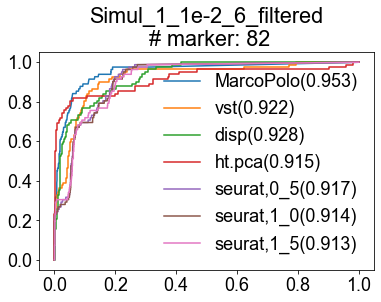

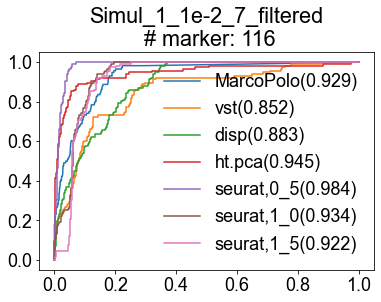

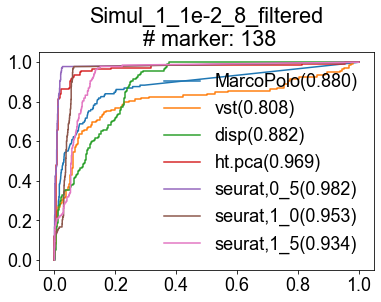

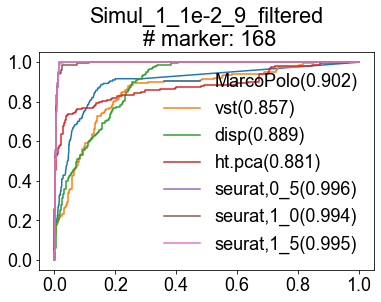

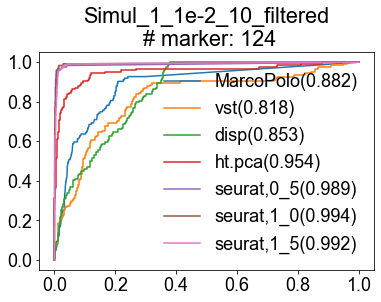

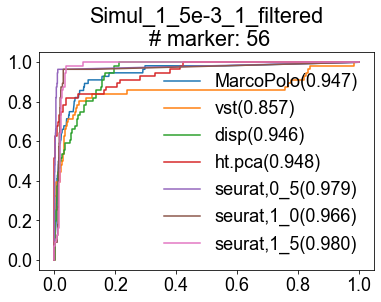

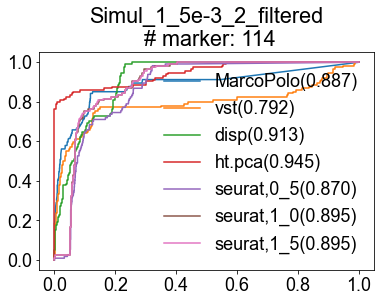

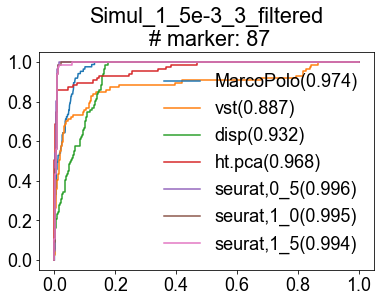

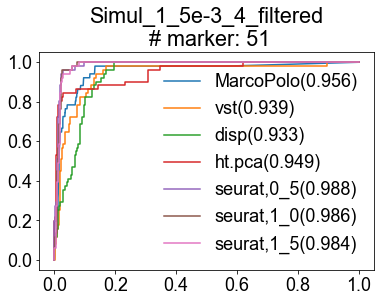

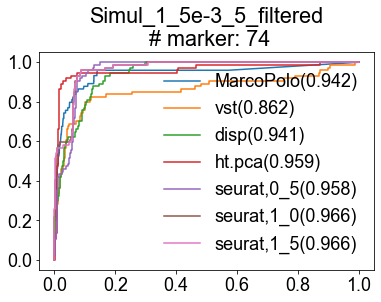

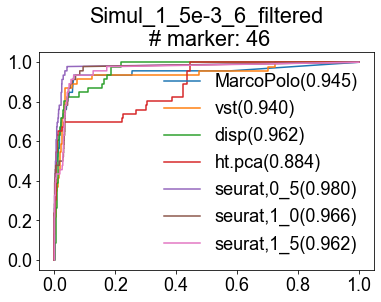

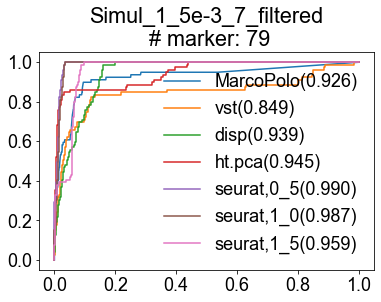

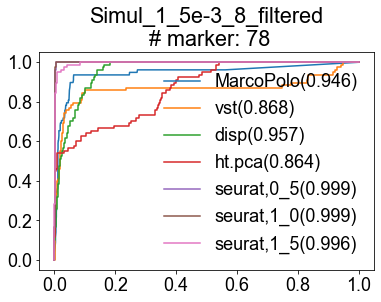

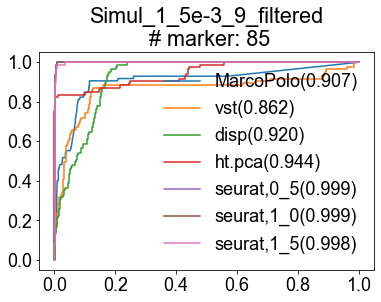

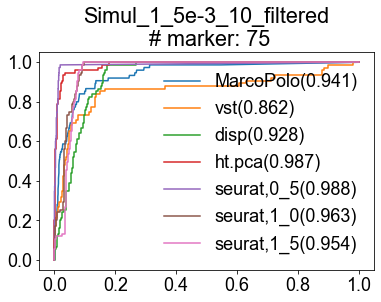

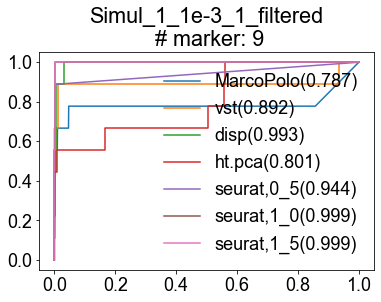

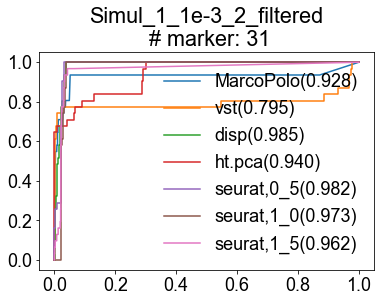

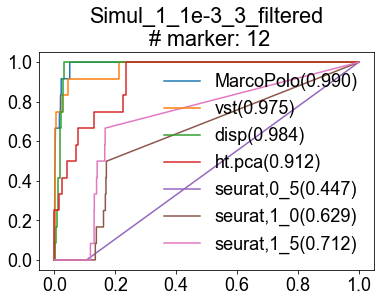

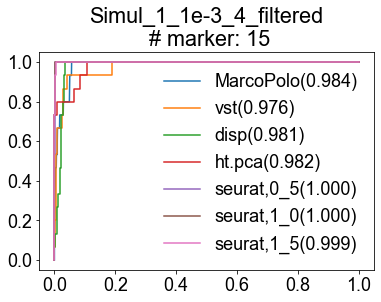

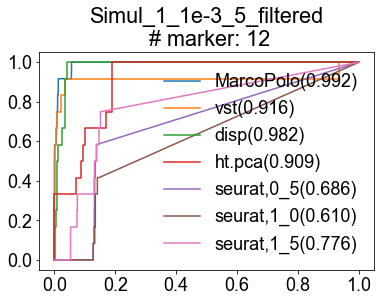

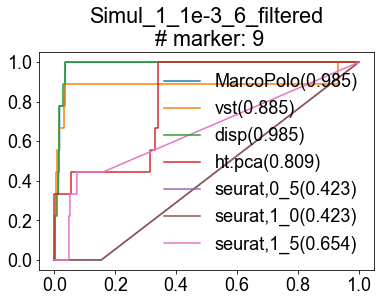

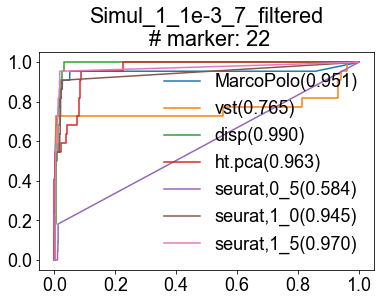

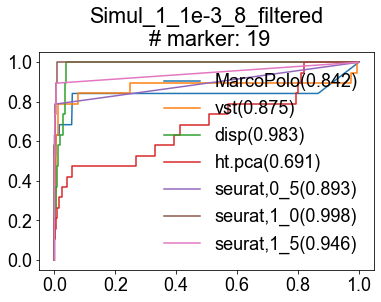

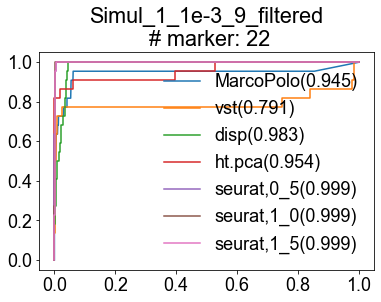

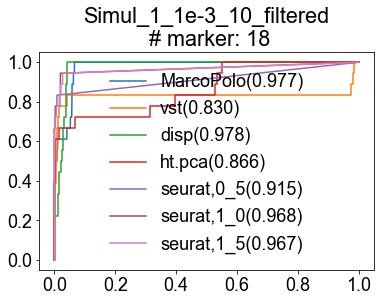

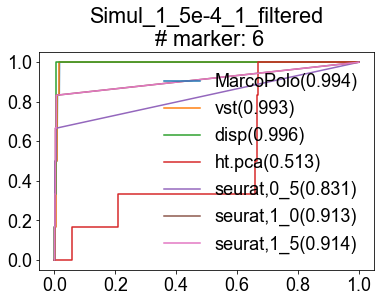

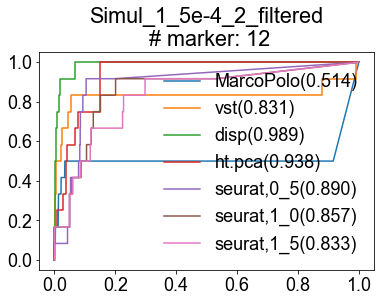

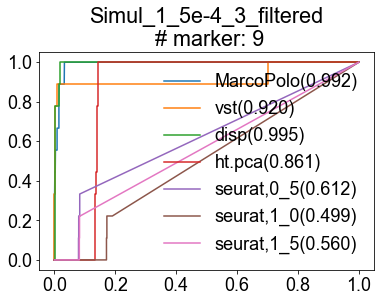

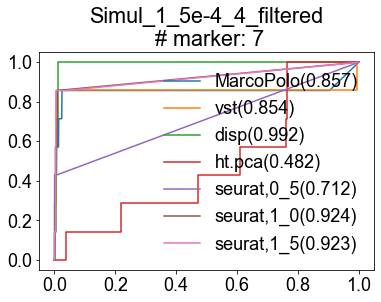

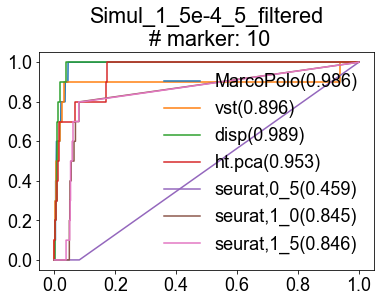

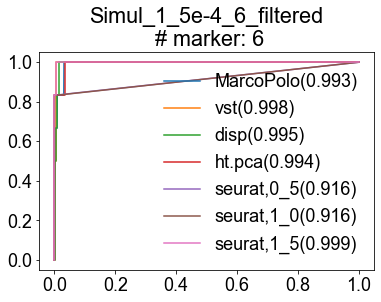

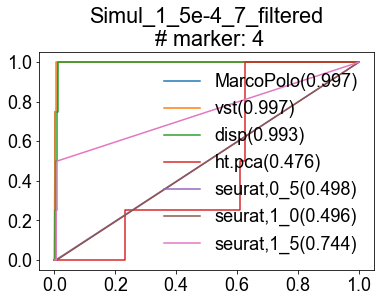

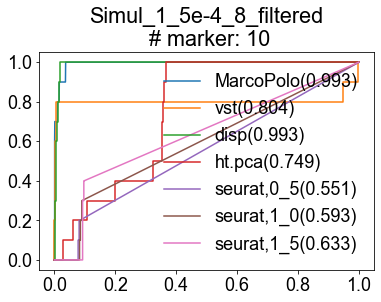

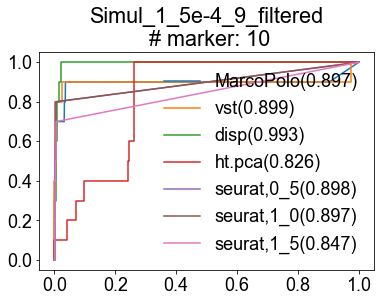

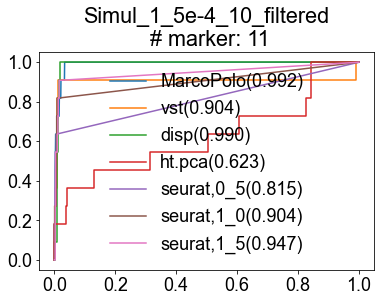

In [19]:
record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])
for prop in ['1e-2','5e-3','1e-3','5e-4'][::]:
    for i in range(1,10+1):

        dataset_name='Simul_1_{}_{}_filtered'.format(prop,i)
        plt.figure()
        print(dataset_name)

        with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]


        if dataset_name=='Kohinbulk_filtered':
            marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
        elif dataset_name=='Zhengmix8eq_filtered':
            marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
        elif dataset_name=='HumanLiver_filtered':
            marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
        else:
            marker=load_marker(dataset_name,method='truelabel_maxdiff')
        """
        elif dataset_name=='Zhengmix4eq_filtered':        
            marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
        elif dataset_name=='Zhengmix4uneq_filtered':        
            marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
        """            

        DE_bool=list(map(lambda x: x in marker, exp_data_row))


        for method in ['MarcoPolo','vst','disp','ht.pca','seurat,0_5','seurat,1_0','seurat,1_5']:
            print(method)
            score=load_score(dataset_name,method)
            auc=roc_auc_score(DE_bool,score)

            fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score);
            plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,auc))

            record_list.append({
                'Prob of non-zero gene effect':'{:s}'.format(str(prop)),
                'num_marker':np.sum(DE_bool),
                'Method':method_mapper(method),
                'AUC':auc        
            })        


        #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
        plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
        plt.legend()     

        plt.plot()

In [20]:
record_list_df=pd.DataFrame(record_list)
record_list_df['Prob of non-zero gene effect_num']=record_list_df['Prob of non-zero gene effect'].astype(float)
record_list_df

,Prob of non-zero gene effect,num_marker,Method,AUC,Prob of non-zero gene effect_num
0,1e-2,127,MarcoPolo,0.856507,0.0100
1,1e-2,127,HVG (VST),0.824501,0.0100
2,1e-2,127,HVG (DISP),0.889179,0.0100
3,1e-2,127,Haystack,0.855154,0.0100
4,1e-2,127,Seurat (res=0.5),0.989935,0.0100
...,...,...,...,...,...
275,5e-4,11,HVG (DISP),0.989987,0.0005
276,5e-4,11,Haystack,0.622932,0.0005
277,5e-4,11,Seurat (res=0.5),0.815312,0.0005
278,5e-4,11,Seurat (res=1.0),0.904329,0.0005


In [21]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_qual_6)

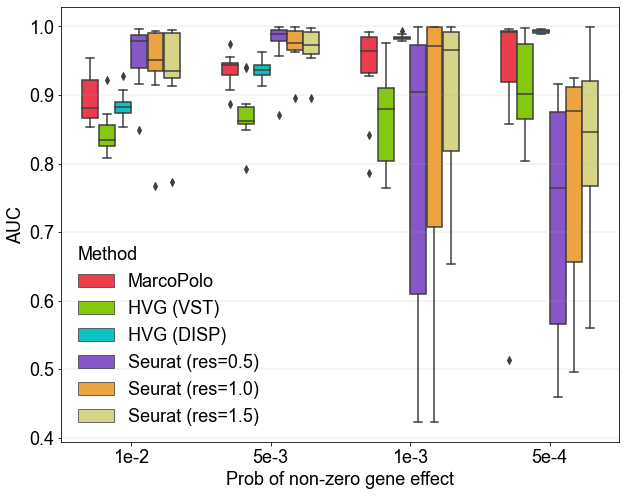

In [22]:
fig = plt.figure(figsize=(10, 8)) 
fig_sub1=fig.add_subplot()

sns.boxplot(x='Prob of non-zero gene effect',y='AUC',
            order=['1e-2','5e-3','1e-3','5e-4'],
            hue='Method',
            data=record_list_df[record_list_df['Method']!='Haystack'],
            width=0.7,
            saturation=0.9,
            ax=fig_sub1
           )
fig_sub1.yaxis.grid(True,linewidth=0.4,alpha=0.6)
#leg=fig_sub1.legend()
fig_sub1.get_legend()._legend_box.align = "left"
#plt.legend()

In [24]:
record_list_df.groupby(['Prob of non-zero gene effect','Method']).median()

num_marker       AUC  \
Prob of non-zero gene effect Method                                   
1e-2                         HVG (DISP)             125.5  0.882245   
                             HVG (VST)              125.5  0.834812   
                             Haystack               125.5  0.941875   
                             MarcoPolo              125.5  0.881025   
                             Seurat (res=0.5)       125.5  0.978168   
                             Seurat (res=1.0)       125.5  0.950415   
                             Seurat (res=1.5)       125.5  0.934370   
1e-3                         HVG (DISP)              16.5  0.983515   
                             HVG (VST)               16.5  0.880245   
                             Haystack                16.5  0.910842   
                             MarcoPolo               16.5  0.963712   
                             Seurat (res=0.5)        16.5  0.904232   
                             Seurat (res=1.0)        16.5  0.970733   
                             Seurat (res=1.5)        16.5  0.964968   
5e-3                         HVG (DISP)              76.5  0.936298   
                             HVG (VST)               76.5  0.862057   
                             Haystack                76.5  0.946752   
                             MarcoPolo               76.5  0.943631   
                             Seurat (res=0.5)        76.5  0.988269   
                             Seurat (res=1.0)        76.5  0.976245   
                             Seurat (res=1.5)        76.5  0.972946   
5e-4                         HVG (DISP)               9.5  0.992617   
                             HVG (VST)                9.5  0.901615   
                             Haystack                 9.5  0.787517   
                             MarcoPolo                9.5  0.991599   
                             Seurat (res=0.5)         9.5  0.763842   
                             Seurat (res=1.0)         9.5  0.876970   
                             Seurat (res=1.5)         9.5  0.846695   

                                               Prob of non-zero gene effect_num  
Prob of non-zero gene effect Method                                              
1e-2                         HVG (DISP)                                  0.0100  
                             HVG (VST)                                   0.0100  
                             Haystack                                    0.0100  
                             MarcoPolo                                   0.0100  
                             Seurat (res=0.5)                            0.0100  
                             Seurat (res=1.0)                            0.0100  
                             Seurat (res=1.5)                            0.0100  
1e-3                         HVG (DISP)                                  0.0010  
                             HVG (VST)                                   0.0010  
                             Haystack                                    0.0010  
                             MarcoPolo                                   0.0010  
                             Seurat (res=0.5)                            0.0010  
                             Seurat (res=1.0)                            0.0010  
                             Seurat (res=1.5)                            0.0010  
5e-3                         HVG (DISP)                                  0.0050  
                             HVG (VST)                                   0.0050  
                             Haystack                                    0.0050  
                             MarcoPolo                                   0.0050  
                             Seurat (res=0.5)                            0.0050  
                             Seurat (res=1.0)                            0.0050  
                             Seurat (res=1.5)                            0.0050  
5e-4                         H

In [25]:
def iqr_func(x):

    q3, q1 = np.percentile(x, [75, 25])
    #print(x)
    iqr = q3 - q1
    #print(iqr)
    return iqr

record_list_df.groupby(['Prob of non-zero gene effect','Method']).agg(iqr_func)

num_marker       AUC  \
Prob of non-zero gene effect Method                                   
1e-2                         HVG (DISP)             18.00  0.016164   
                             HVG (VST)              18.00  0.030118   
                             Haystack               18.00  0.032222   
                             MarcoPolo              18.00  0.055205   
                             Seurat (res=0.5)       18.00  0.048251   
                             Seurat (res=1.0)       18.00  0.056761   
                             Seurat (res=1.5)       18.00  0.066414   
1e-3                         HVG (DISP)              9.25  0.003024   
                             HVG (VST)               9.25  0.106085   
                             Haystack                9.25  0.127571   
                             MarcoPolo               9.25  0.052748   
                             Seurat (res=0.5)        9.25  0.363314   
                             Seurat (res=1.0)        9.25  0.291140   
                             Seurat (res=1.5)        9.25  0.172889   
5e-3                         HVG (DISP)             23.00  0.015595   
                             HVG (VST)              23.00  0.023883   
                             Haystack               23.00  0.012381   
                             MarcoPolo              23.00  0.017207   
                             Seurat (res=0.5)       23.00  0.015103   
                             Seurat (res=1.0)       23.00  0.027072   
                             Seurat (res=1.5)       23.00  0.031829   
5e-4                         HVG (DISP)              3.75  0.003928   
                             HVG (VST)               3.75  0.110167   
                             Haystack                3.75  0.378095   
                             MarcoPolo               3.75  0.074096   
                             Seurat (res=0.5)        3.75  0.308734   
                             Seurat (res=1.0)        3.75  0.255435   
                             Seurat (res=1.5)        3.75  0.154256   

                                               Prob of non-zero gene effect_num  
Prob of non-zero gene effect Method                                              
1e-2                         HVG (DISP)                                     0.0  
                             HVG (VST)                                      0.0  
                             Haystack                                       0.0  
                             MarcoPolo                                      0.0  
                             Seurat (res=0.5)                               0.0  
                             Seurat (res=1.0)                               0.0  
                             Seurat (res=1.5)                               0.0  
1e-3                         HVG (DISP)                                     0.0  
                             HVG (VST)                                      0.0  
                             Haystack                                       0.0  
                             MarcoPolo                                      0.0  
                             Seurat (res=0.5)                               0.0  
                             Seurat (res=1.0)                               0.0  
                             Seurat (res=1.5)                               0.0  
5e-3                         HVG (DISP)                                     0.0  
                             HVG (VST)                                      0.0  
                             Haystack                                       0.0  
                             MarcoPolo                                      0.0  
                             Seurat (res=0.5)                               0.0  
                             Seurat (res=1.0)                               0.0  
                             Seurat (res=1.5)                               0.0  
5e-4                         H

In [26]:
record_list_df

,Prob of non-zero gene effect,num_marker,Method,AUC,Prob of non-zero gene effect_num
0,1e-2,127,MarcoPolo,0.856507,0.0100
1,1e-2,127,HVG (VST),0.824501,0.0100
2,1e-2,127,HVG (DISP),0.889179,0.0100
3,1e-2,127,Haystack,0.855154,0.0100
4,1e-2,127,Seurat (res=0.5),0.989935,0.0100
...,...,...,...,...,...
275,5e-4,11,HVG (DISP),0.989987,0.0005
276,5e-4,11,Haystack,0.622932,0.0005
277,5e-4,11,Seurat (res=0.5),0.815312,0.0005
278,5e-4,11,Seurat (res=1.0),0.904329,0.0005


In [27]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_qual_7)

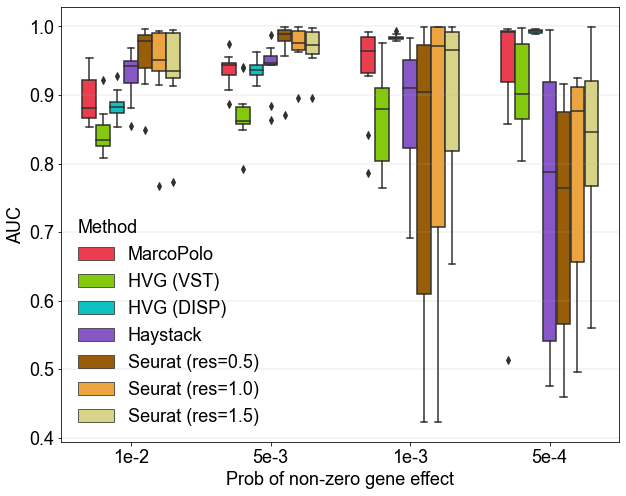

In [28]:
fig = plt.figure(figsize=(10, 8)) 
fig_sub1=fig.add_subplot()

sns.boxplot(x='Prob of non-zero gene effect',y='AUC',
            order=['1e-2','5e-3','1e-3','5e-4'],
            hue='Method',
            data=record_list_df,
            width=0.7,
            saturation=0.9,
            ax=fig_sub1
           )
fig_sub1.yaxis.grid(True,linewidth=0.4,alpha=0.6)
#leg=fig_sub1.legend()
fig_sub1.get_legend()._legend_box.align = "left"
#plt.legend()

In [29]:
fig.savefig('pub/simul.png', bbox_inches='tight')
fig.savefig('pub/simul.jpg', bbox_inches='tight')
fig.savefig('pub/simul.svg', bbox_inches='tight')

# real data

In [21]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_qual_7)

In [22]:
def get_metric(true_label,predict_label):
    true_label=np.array(true_label)
    predict_label=np.array(predict_label)
    
    assert len(true_label)==len(predict_label)
    
    precision=(np.sum(predict_label&true_label))/(np.sum(predict_label))
    recall=(np.sum(predict_label&true_label))/(np.sum(true_label))
    accuracy=(np.sum(predict_label==true_label))/(len(true_label))
    
    F1=2*(precision*recall)/(precision+recall)
    
    return {
        'precision':precision,
        'recall':recall,
        'accuracy':accuracy,
        'F1':F1
    }

In [23]:
len(load_marker('Kohinbulk_filtered',method='truelabel_maxdiff'))

200

In [24]:
len(load_marker('HumanLiver_filtered',method='truelabel_maxdiff'))

200

In [25]:
len(load_marker('Zhengmix8eq_filtered',method='truelabel_maxdiff'))

68

Kohinbulk_filtered
MarcoPolo
ht.pca
vst
disp
seurat,0_5
seurat,1_0
seurat,1_5
HumanLiver_filtered
MarcoPolo
ht.pca
vst
disp
seurat,0_5
seurat,1_0
seurat,1_5
Zhengmix8eq_filtered
MarcoPolo
ht.pca
vst
disp
seurat,0_5
seurat,1_0
seurat,1_5


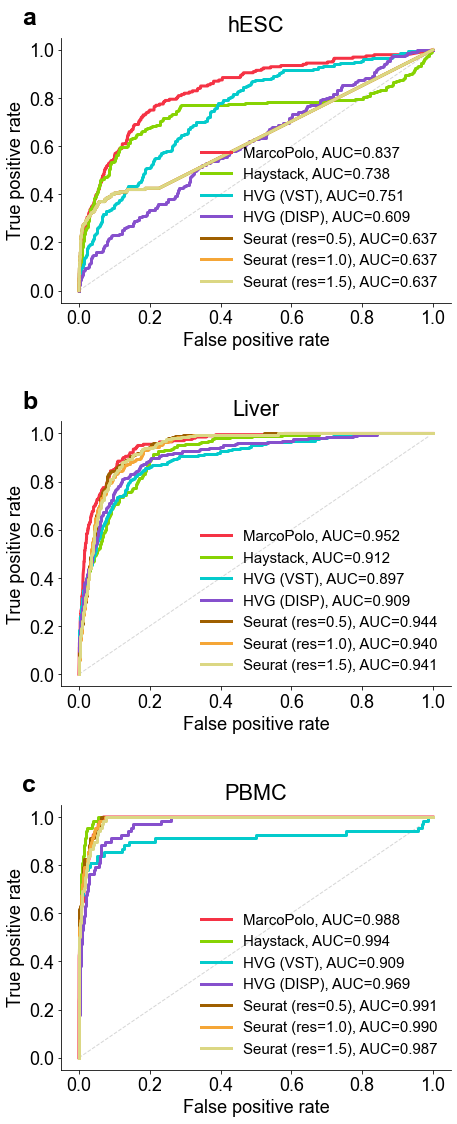

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(7+1,7*3)) 
gs=fig.add_gridspec(7*3,7+1)


record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])
for idx,dataset_name in enumerate(dataset_name_all):
    plt.figure()
    print(dataset_name)

    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]


    if dataset_name=='Kohinbulk_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
    elif dataset_name=='Zhengmix8eq_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
    elif dataset_name=='HumanLiver_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
    else:
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    marker=load_marker(dataset_name,method='truelabel_maxdiff')
    """
    elif dataset_name=='Zhengmix4eq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
    elif dataset_name=='Zhengmix4uneq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
    """            

    DE_bool=list(map(lambda x: x in marker, exp_data_row))

    fig_rocplot=fig.add_subplot(gs[7*idx:7*idx+5,0:7])
    fig_rocplot.text(-0.1, 1.05, ['a','b','c'][idx], fontproperties=font_prop(bold=True,size=25), transform=fig_rocplot.transAxes)
    
    fig_rocplot.set_xlabel('False positive rate')
    fig_rocplot.set_ylabel('True positive rate')
    
    fig_rocplot.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),c=(0.8,0.8,0.8,0.8),linewidth=1.0,linestyle='--')
    
    fig_rocplot.set_title(dataset_name_mapper(dataset_name))
    for method in ['MarcoPolo','ht.pca','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)
        auc=roc_auc_score(DE_bool,score)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score)
        fpr_all, tpr_all, thresholds_all = metrics.roc_curve(DE_bool,score,drop_intermediate=False)
        
        
        fig_rocplot.plot(fpr,
                         tpr,
                         label='{method:} AUC={AUC:.3f}'.format(
                                                                method=method_mapper(method)+',',
                                                                AUC=auc),
                         linewidth=3.0
                        )
        
        
        #title()
        score_thres=sorted(score)[::-1][100]
        
        metric=get_metric(DE_bool,score>score_thres)
        
        record_list.append({
            'Dataset':dataset_name_mapper(dataset_name),
            'num_marker':np.sum(DE_bool),
            'Method':method_mapper(method),
            'AUC':auc,
            'Precision':metric['precision'],
            'Recall (FPR)':tpr_all[fpr_all>0.2][0],
            'Recall':metric['recall'],
            'F-score':metric['F1'],            
        })   
        
    leg=fig_rocplot.legend(loc='lower right',fontsize=15)

        
    fig_rocplot.spines['right'].set_visible(False)
    fig_rocplot.spines['top'].set_visible(False)

    

In [33]:
fig.savefig('pub/auc.png', bbox_inches='tight')
fig.savefig('pub/auc.jpg', bbox_inches='tight')
fig.savefig('pub/auc.svg', bbox_inches='tight')
    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    #plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    #plt.legend()     

In [48]:
len(fpr_all),len(tpr_all),len(score)

(2378, 2378, 4714)

In [49]:
fpr[:100]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.45716746e-04,
       6.45716746e-04, 8.60955661e-04, 8.60955661e-04, 1.07619458e-03,
       1.07619458e-03, 1.29143349e-03, 1.29143349e-03, 1.50667241e-03,
       1.50667241e-03, 1.72191132e-03, 1.72191132e-03, 3.44382264e-03,
       3.44382264e-03, 4.52001722e-03, 4.52001722e-03, 5.38097288e-03,
       5.38097288e-03, 5.59621180e-03, 5.59621180e-03, 5.81145071e-03,
       5.81145071e-03, 7.31812312e-03, 7.31812312e-03, 8.60955661e-03,
       8.60955661e-03, 9.04003444e-03, 9.04003444e-03, 1.01162290e-02,
       1.01162290e-02, 1.44210073e-02, 1.44210073e-02, 1.61429186e-02,
       1.61429186e-02, 1.78648300e-02, 1.78648300e-02, 1.91562635e-02,
       1.91562635e-02, 2.04476969e-02, 2.04476969e-02, 2.34610418e-02,
       2.34610418e-02, 2.38915196e-02, 2.38915196e-02, 2.64743866e-02,
       2.64743866e-02, 2.66896255e-02, 2.66896255e-02, 3.12096427e-02,
       3.12096427e-02, 3.27163151e-02, 3.27163151e-02, 4.08953939e-02,
      

In [50]:
len(fpr)

75

In [51]:
record_list_df_Recall=pd.DataFrame(record_list).pivot(index='Dataset',columns='Method',values='Recall (FPR)')#
record_list_df_Recall

Method,HVG (DISP),HVG (VST),Haystack,MarcoPolo,Seurat (res=0.5),Seurat (res=1.0),Seurat (res=1.5)
Dataset,,,,,,,
Liver,0.890000,0.860000,0.885,0.955,0.945,0.945,0.940
PBMC,0.970588,0.897059,1.000,1.000,1.000,1.000,1.000
hESC,0.335000,0.515000,0.680,0.750,0.425,0.425,0.425


In [52]:
record_list_df_Recall=record_list_df_Recall.loc[['hESC','Liver','PBMC']]

In [53]:
record_list_df_Recall=record_list_df_Recall[['MarcoPolo','Haystack','HVG (DISP)', 'HVG (VST)','Seurat (res=0.5)',
       'Seurat (res=1.0)', 'Seurat (res=1.5)']]

In [54]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_qual_7)

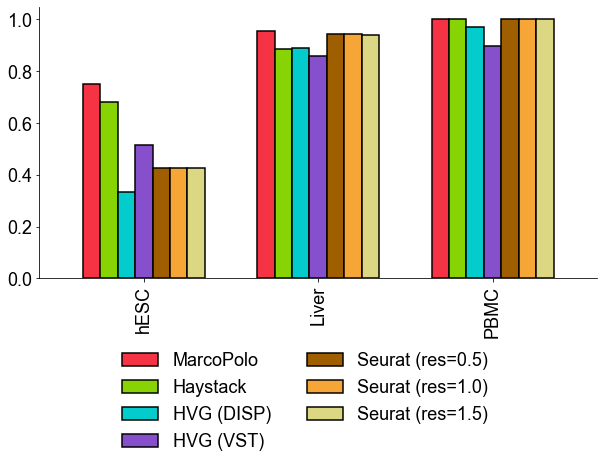

In [55]:
fig=plt.figure(figsize=(10, 5))
fig_sub1=fig.add_subplot()

record_list_df_Recall.plot.bar(width=0.7,linewidth=1.5,edgecolor='black',ax=fig_sub1)

leg=fig_sub1.legend(loc='upper left',
                    #bbox_to_anchor=(0.45,-0.1),
                    bbox_to_anchor=(0.12, -0.21),
                    ncol=2,
                    markerscale=2.5)

fig_sub1.set_xlabel('')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False) 

In [56]:
fig.savefig('pub/auc_recall.png', bbox_inches='tight')
fig.savefig('pub/auc_recall.svg', bbox_inches='tight')

# type finding

In [57]:
color_qual_3_two=[color_qual_3[0],1.7*color_qual_3[0],
                  color_qual_3[1],1.7*color_qual_3[1],
                  color_qual_3[2],1.7*color_qual_3[2]]
color_qual_3_two=np.clip(color_qual_3_two,a_max=1,a_min=0)
color_qual_3_two=[color_qual_3[0],color_qual_3[0],color_qual_3[1],color_qual_3[1],color_qual_3[2],color_qual_3[2]]

In [58]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_qual_3_two)

In [59]:
pd.read_csv('datasets/extract/{}.typefinding.MarcoPolo.tsv'.format(dataset_name),sep='\t',index_col=0)

,b.cells,naive.cytotoxic,cd14.monocytes,regulatory.t,cd4.t.helper,cd56.nk,memory.t,naive.t
ENSG00000115523,0.000000,0.000000,0.008333,0.006024,0.0150,0.985000,0.010,0.000000
ENSG00000143546,0.000000,0.000000,0.840000,0.000000,0.0000,0.000000,0.000,0.000000
ENSG00000019582,1.000000,0.002513,0.615000,0.006024,0.0025,0.003333,0.000,0.004008
ENSG00000170296,0.138277,0.092965,0.615000,0.144578,0.1050,0.108333,0.146,0.108216
ENSG00000163220,0.000000,0.000000,0.838333,0.000000,0.0000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...,...
ENSG00000165502,0.440882,0.530151,0.348333,0.327309,0.3475,0.556667,0.574,0.344689
ENSG00000038427,0.000000,0.000000,0.103333,0.000000,0.0000,0.000000,0.000,0.000000
ENSG00000158825,0.000000,0.000000,0.126667,0.000000,0.0000,0.000000,0.000,0.000000
ENSG00000133639,0.462926,0.567839,0.125000,0.580321,0.5575,0.326667,0.414,0.671343


Kohinbulk_filtered
13
Kohinbulk_filtered
18
HumanLiver_filtered
72
HumanLiver_filtered
116
Zhengmix8eq_filtered
38
Zhengmix8eq_filtered
93


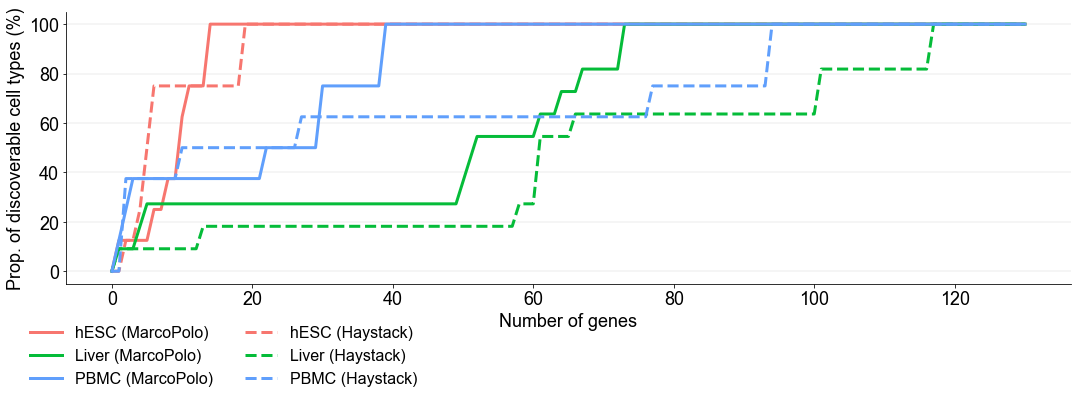

In [60]:
#fig=plt.figure(figsize=(6, 5))
fig=plt.figure(figsize=(18, 5))
fig_sub1=fig.add_subplot()

mode=2

for idx,dataset_name in enumerate(dataset_name_all):
    print(dataset_name)
    
    allscore_munged=pd.read_csv('datasets/extract/{}.MarcoPolo.{}.rank.munge.tsv'.format(dataset_name,mode),sep='\t',index_col=0)
    
    
    marker_matrix=pd.read_csv('datasets/extract/{}.typefinding.MarcoPolo.tsv'.format(dataset_name),sep='\t',index_col=0)
    marker_matrix_bool=marker_matrix.applymap(lambda x: int(x>0.7))
    
    marker_matrix_bool_distinguished=marker_matrix_bool.copy()
    marker_matrix_bool_distinguished.iloc[:,:]=np.nan
    for i,(idx,row) in enumerate(marker_matrix_bool.iterrows()):
        marker_matrix_bool_cut=marker_matrix_bool.iloc[:i+1,:]
        check=[np.sum(marker_matrix_bool_cut.apply(lambda x: np.all(x==value),axis=0))==1 for col,value in marker_matrix_bool_cut.iteritems()]
        marker_matrix_bool_distinguished.loc[idx]=check
    marker_matrix_bool_distinguished=marker_matrix_bool_distinguished.astype(int)   
    marker_matrix_bool_distinguished_diff=marker_matrix_bool_distinguished.diff()
    marker_matrix_bool_distinguished_diff.iloc[0,:]=marker_matrix_bool_distinguished.iloc[0,:]
    marker_matrix_bool_distinguished_diff=marker_matrix_bool_distinguished_diff.astype(int)        
    
    marker_matrix_bool['MarcoPolo rank']=allscore_munged.set_index('Gene ID').loc[marker_matrix_bool.index]['MarcoPolo_rank']+1
    marker_matrix_bool['Symbol']=allscore_munged.set_index('Gene ID').loc[marker_matrix_bool.index]['Symbol']
    marker_matrix_bool=marker_matrix_bool.reset_index().set_index('MarcoPolo rank')
    marker_matrix_bool=marker_matrix_bool[marker_matrix_bool.columns[-1:].tolist()+marker_matrix_bool.columns[:-1].tolist()]        
    
    
    idx_finish=marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().values.tolist()\
    .index(marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().max())
    
    
    marker_matrix_bool.iloc[:idx_finish+1,:].to_csv('pub/{}.typefinding.MarcoPolo.tsv'.format(dataset_name),sep='\t')
    marker_matrix_bool.iloc[:,:].to_csv('pub/{}.typefinding.MarcoPolo.all.tsv'.format(dataset_name),sep='\t')

    marker_matrix_bool_distinguished_diff.iloc[:idx_finish+1,:].to_csv('pub/{}.typefindingcheck.MarcoPolo.tsv'.format(dataset_name),sep='\t')    
    marker_matrix_bool_distinguished_diff.iloc[:,:].to_csv('pub/{}.typefindingcheck.MarcoPolo.all.tsv'.format(dataset_name),sep='\t')        
    
    print(idx_finish)
    fig_sub1.plot([0]+marker_matrix_bool.index.values[:130].tolist(),
                 [0]+(marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().values[:130]/marker_matrix.shape[1]*100).tolist(),
                 label='{dataset_name:} (MarcoPolo)'.format(dataset_name=dataset_name_mapper(dataset_name)),
                 linewidth=3.0)
    
    
    
    
    
    
#for idx,dataset_name in enumerate(dataset_name_all):
    print(dataset_name)
    
    allscore_munged=pd.read_csv('datasets/extract/{}.MarcoPolo.{}.rank.munge.tsv'.format(dataset_name,mode),sep='\t',index_col=0)

    
    
    
    allscore_ht=pd.read_csv('datasets/extract/{}.hvg.ht.pca.tsv'.format(dataset_name),sep='\t',index_col=0)
    allscore_ht['ht_rank']=list(range(0,len(allscore_ht)))
    allscore_ht=allscore_ht.loc[allscore_munged['Gene ID']].reset_index()
    allscore_ht=allscore_ht.rename(columns={'index':'Gene ID'})
    allscore_ht['Symbol']=allscore_munged['Symbol']    
    allscore_munged=allscore_ht
    
    
    
    
    
    
    
    marker_matrix=pd.read_csv('datasets/extract/{}.typefinding.ht.pca.tsv'.format(dataset_name),sep='\t',index_col=0)
    marker_matrix_bool=marker_matrix.applymap(lambda x: int(x>0.7))
    
    marker_matrix_bool_distinguished=marker_matrix_bool.copy()
    marker_matrix_bool_distinguished.iloc[:,:]=np.nan
    for i,(idx,row) in enumerate(marker_matrix_bool.iterrows()):
        marker_matrix_bool_cut=marker_matrix_bool.iloc[:i+1,:]
        check=[np.sum(marker_matrix_bool_cut.apply(lambda x: np.all(x==value),axis=0))==1 for col,value in marker_matrix_bool_cut.iteritems()]
        marker_matrix_bool_distinguished.loc[idx]=check
    marker_matrix_bool_distinguished=marker_matrix_bool_distinguished.astype(int)   
    marker_matrix_bool_distinguished_diff=marker_matrix_bool_distinguished.diff()
    marker_matrix_bool_distinguished_diff.iloc[0,:]=marker_matrix_bool_distinguished.iloc[0,:]
    marker_matrix_bool_distinguished_diff=marker_matrix_bool_distinguished_diff.astype(int)        
    
    marker_matrix_bool['haystack rank']=allscore_munged.set_index('Gene ID').loc[marker_matrix_bool.index]['ht_rank']+1
    marker_matrix_bool['Symbol']=allscore_munged.set_index('Gene ID').loc[marker_matrix_bool.index]['Symbol']
    marker_matrix_bool=marker_matrix_bool.reset_index().set_index('haystack rank')
    marker_matrix_bool=marker_matrix_bool[marker_matrix_bool.columns[-1:].tolist()+marker_matrix_bool.columns[:-1].tolist()]        
    
    
    idx_finish=marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().values.tolist()\
    .index(marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().max())
    
    
    marker_matrix_bool.iloc[:idx_finish+1,:].to_csv('pub/{}.typefinding.ht.pca.tsv'.format(dataset_name),sep='\t')
    marker_matrix_bool.iloc[:,:].to_csv('pub/{}.typefinding.ht.pca.all.tsv'.format(dataset_name),sep='\t')
    
    marker_matrix_bool_distinguished_diff.iloc[:idx_finish+1,:].to_csv('pub/{}.typefindingcheck.ht.pca.tsv'.format(dataset_name),sep='\t')    
    marker_matrix_bool_distinguished_diff.iloc[:,:].to_csv('pub/{}.typefindingcheck.ht.pca.all.tsv'.format(dataset_name),sep='\t')    
    
    
    print(idx_finish)
    fig_sub1.plot([0]+marker_matrix_bool.index.values[:130].tolist(),
                 [0]+(marker_matrix_bool_distinguished_diff.sum(axis=1).cumsum().values[:130]/marker_matrix.shape[1]*100).tolist(),
                 label='{dataset_name:} (Haystack)'.format(dataset_name=dataset_name_mapper(dataset_name)),
                linestyle='--',
                 linewidth=3.0)    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    #plt.xscale('log')
fig_sub1.set_xlabel('Number of genes')
fig_sub1.set_ylabel('Prop. of discoverable cell types (%)')    
fig_sub1.yaxis.grid(True,linewidth=0.4,alpha=0.6)

#leg=fig_sub1.legend(loc='lower right')#,fontsize=15)
#leg=fig_sub1.legend(loc='lower right')#,fontsize=15)
handles, labels = fig_sub1.get_legend_handles_labels()
#order = [0,3,1,4,2,5]
order = [0,2,4,1,3,5]
handles, labels=[handles[idx] for idx in order],[labels[idx] for idx in order]

leg=fig_sub1.legend(handles, labels,loc='upper left',
                    fontsize=16,
                    #bbox_to_anchor=(0.45,-0.1),
                    bbox_to_anchor=(-0.05, -0.1),
                    ncol=2,
                    markerscale=2.5)

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

In [61]:
fig.savefig('pub/typefinding.png', bbox_inches='tight')
fig.savefig('pub/typefinding.jpg', bbox_inches='tight')
fig.savefig('pub/typefinding.svg', bbox_inches='tight')

# Robustness2

In [62]:
method_list=['vst','disp','MarcoPolovst','MarcoPolodisp']
#method_list=['vst','disp','mvp','MarcoPolovst','MarcoPolomvp','MarcoPolodisp']

result_all={}

for dataset_name in dataset_name_all:   
    
    robustness=pd.read_csv('datasets/extract/{}.clusteringrobustness.tsv'.format(dataset_name),sep='\t')
    
    ari_result=pd.DataFrame(index=[i.replace('-vst','') for i in robustness.columns[robustness.columns.str.contains('-vst-')]],
                            columns=method_list)
    ari_rare_result=pd.DataFrame(index=[i.replace('-vst','') for i in robustness.columns[robustness.columns.str.contains('-vst-')]],
                                 columns=method_list)    
    
    for method in method_list:
        ari_temp=[]
        ari_rare_temp=[]
        robustness_subset=robustness[robustness.columns[robustness.columns.str.contains('-'+method+'-',regex=False)]]


        for label,content in robustness_subset.iteritems():
            label_nfeatures,label_methods,label_resolution=label.split('-')

            #if float(label_nfeatures)>500:
            #    continue        

            #if float(label_resolution)<1:
            #    continue

            true=robustness['result_summary']
            pred=content

            if dataset_name=='Kohinbulk_filtered':
                rare_list=['APS','MPS']
            elif dataset_name=='HumanLiver_filtered':
                rare_list=['ab T cells','NK cells','Erythroid cells','gd T cells']
                #rare_list=['ab T cells','gd T cells']
                rare_list=robustness['result_summary'].value_counts().index[-3:].values
            elif dataset_name=='Zhengmix4eq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t']
            elif dataset_name=='Zhengmix4uneq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t']
            elif dataset_name=='Zhengmix8eq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t','memory.t','naive.t','cd4.t.helper']

                

            bool_rare=np.array([value in rare_list for value in true.values])

            ari_result.loc['{}-{}'.format(label_nfeatures,label_resolution),method]=adjusted_rand_score(true,pred)
            ari_rare_result.loc['{}-{}'.format(label_nfeatures,label_resolution),method]=adjusted_rand_score(true[bool_rare],pred[bool_rare])
    
    thres_rare=np.mean(ari_rare_result.values.flatten())
    print(thres_rare)
    ari_cut=((ari_result>np.mean(ari_result.values.flatten())).sum(axis=0)/(~ari_result.isnull()).sum(axis=0))
    ari_rare_cut=((ari_rare_result>thres_rare).sum(axis=0)/(~ari_rare_result.isnull()).sum(axis=0))
    
    result_all[dataset_name_mapper(dataset_name)]=(ari_result,ari_rare_result,ari_cut,ari_rare_cut)

0.40109639921839974
0.9485943964626729
0.3586433767728818


In [63]:
ari_cut_all={}
for dataset_name in dataset_name_all:
    ari_cut=result_all[dataset_name_mapper(dataset_name)][3]
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={'w/   MarcoPolo':ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean(),
                                                    'w/o MarcoPolo':ari_cut.loc[~ari_cut.index.str.contains('MarcoPolo')].mean()
                                                    }

In [64]:
#result_all

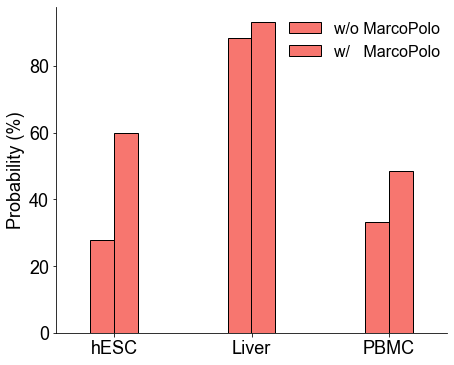

In [65]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(pd.DataFrame(ari_cut_all).T.iloc[:,::-1]*100).plot.bar(width=0.35,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
leg=fig_sub1.legend(loc='upper right',bbox_to_anchor=(1.02,1),fontsize=16)
fig_sub1.set_ylabel('Probability (%)')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)

# Robustness

In [116]:
#[i.replace('200-','').replace('-0.6','') for i in robustness.columns[robustness.columns.str.contains('-0.6')]]

In [582]:
method_list=['vst','disp','MarcoPolovst','MarcoPolodisp','htvst','htdisp']
#method_list=['vst','disp','mvp','MarcoPolovst','MarcoPolomvp','MarcoPolodisp']
#method_list=['vst','disp','MarcoPolovst','MarcoPolodisp']

result_all={}

for dataset_name in dataset_name_all:   
    
    robustness=pd.read_csv('datasets/extract/{}.clusteringrobustness.tsv'.format(dataset_name),sep='\t')
    
    ari_result=pd.DataFrame(index=[i.replace('-vst','') for i in robustness.columns[robustness.columns.str.contains('-vst-')]],
                            columns=method_list)
    ari_rare_result=pd.DataFrame(index=[i.replace('-vst','') for i in robustness.columns[robustness.columns.str.contains('-vst-')]],
                                 columns=method_list)    
    
    for method in method_list:
        ari_temp=[]
        ari_rare_temp=[]
        robustness_subset=robustness[robustness.columns[robustness.columns.str.contains('-'+method+'-',regex=False)]]


        for label,content in robustness_subset.iteritems():
            label_nfeatures,label_methods,label_resolution=label.split('-')

            #if float(label_nfeatures)>500:
            #    continue        

            #if float(label_resolution)<1:
            #    continue

            true=robustness['result_summary']
            pred=content

            if dataset_name=='Kohinbulk_filtered':
                rare_list=['APS','MPS']
            elif dataset_name=='HumanLiver_filtered':
                #rare_list=['ab T cells','NK cells','Erythroid cells','gd T cells']
                #rare_list=['ab T cells','gd T cells']
                rare_list=robustness['result_summary'].value_counts().index[-3:].values
                #print(rare_list)
                #print(rare_list)
            elif dataset_name=='Zhengmix4eq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t']
            elif dataset_name=='Zhengmix4uneq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t']
            elif dataset_name=='Zhengmix8eq_filtered':
                rare_list=['naive.cytotoxic','regulatory.t','memory.t','naive.t','cd4.t.helper']

                

            bool_rare=np.array([value in rare_list for value in true.values])

            ari_result.loc['{}-{}'.format(label_nfeatures,label_resolution),method]=adjusted_rand_score(true,pred)
            ari_rare_result.loc['{}-{}'.format(label_nfeatures,label_resolution),method]=adjusted_rand_score(true[bool_rare],pred[bool_rare])
    """
    thres=np.mean(ari_result.values.flatten())
    thres_rare=np.mean(ari_rare_result.values.flatten())
    
    print(dataset_name,thres,thres_rare)
    ari_cut=((ari_result>thres).sum(axis=0)/(~ari_result.isnull()).sum(axis=0))
    ari_rare_cut=((ari_rare_result>thres_rare).sum(axis=0)/(~ari_rare_result.isnull()).sum(axis=0))
    """
    result_all[dataset_name_mapper(dataset_name)]=(ari_result,ari_rare_result)#,ari_cut,ari_rare_cut)
    

In [583]:
#(~ari_cut.index.str.contains('MarcoPolo'))
(~ari_cut.index.str.contains('ht'))

array([ True,  True,  True,  True, False, False])

In [584]:
len(ari_result.values.flatten())

432

In [585]:
ari_cut_all={}
for dataset_name in dataset_name_all:
    ari_result=result_all[dataset_name_mapper(dataset_name)][1]
    #ari_result=ari_result.iloc[:,~ari_result.columns.str.contains('ht')]
    
    #thres=np.mean(ari_result.values.flatten())
    thres=np.quantile(ari_result.values.flatten(),0.25)
    thres_rare=np.mean(ari_rare_result.values.flatten())
    
    print(dataset_name,thres,thres_rare)
    ari_cut=((ari_result>thres).sum(axis=0)/(~ari_result.isnull()).sum(axis=0))
    #ari_rare_cut=((ari_rare_result>thres_rare).sum(axis=0)/(~ari_rare_result.isnull()).sum(axis=0))    
    
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={
        
    #'HVG with MarcoPolo':ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean(),
    #'HVG with Haystack':ari_cut.loc[ari_cut.index.str.contains('ht')].mean(),
    #'HVG (baseline)':ari_cut.loc[(~ari_cut.index.str.contains('ht'))&(~ari_cut.index.str.contains('MarcoPolo'))].mean()
        
    'HVG w/ MarcoPolo':ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean(),
    'HVG w/ Haystack':ari_cut.loc[ari_cut.index.str.contains('ht')].mean(),
    'HVG':ari_cut.loc[(~ari_cut.index.str.contains('ht'))&(~ari_cut.index.str.contains('MarcoPolo'))].mean()        
        
}

Kohinbulk_filtered 0.0 0.39933254595476636
HumanLiver_filtered 0.9580608702016742 0.39933254595476636
Zhengmix8eq_filtered 0.3010831215425295 0.39933254595476636


In [586]:
#np.quantile?

In [587]:
(ari_cut_all)

{'hESC': {'HVG w/ MarcoPolo': 0.5972222222222222,
  'HVG w/ Haystack': 0.0763888888888889,
  'HVG': 0.2777777777777778},
 'Liver': {'HVG w/ MarcoPolo': 0.7847222222222223,
  'HVG w/ Haystack': 0.6944444444444444,
  'HVG': 0.6666666666666666},
 'PBMC': {'HVG w/ MarcoPolo': 0.75,
  'HVG w/ Haystack': 0.8888888888888888,
  'HVG': 0.6111111111111112}}

In [588]:
result_all[dataset_name_mapper('Kohinbulk_filtered')][1]

,vst,disp,MarcoPolovst,MarcoPolodisp,htvst,htdisp
200-0.6,0,-0.0151604,0,0,0,0.0427247
200-0.8,0,-0.0151604,0,0.900142,0,0.0427247
200-1,0,-0.0151604,0,0.900142,0,0.0427247
200-1.2,0,-0.0151604,0,0.900142,0,0.0427247
200-1.4,0,-0.0151604,0,0.900142,0,0.0427247
...,...,...,...,...,...,...
1000-1.2,0,0.949748,0,0.949748,0,0
1000-1.4,0,1,0,0.949748,0,0
1000-1.6,0,1,0.900142,0.949748,0,0
1000-1.8,0,1,0.900142,0.949748,0,0


In [589]:
plt.rcParams["axes.prop_cycle"]=cycler('color',np.array(color_qual_3))#[[1,2,0]])

In [590]:
ari_cut_all_df=pd.DataFrame(ari_cut_all).T
ari_cut_all_df.loc['Overall']=ari_cut_all_df.mean(axis=0)

In [591]:
ari_cut_all_df

,HVG w/ MarcoPolo,HVG w/ Haystack,HVG
hESC,0.597222,0.076389,0.277778
Liver,0.784722,0.694444,0.666667
PBMC,0.750000,0.888889,0.611111
Overall,0.710648,0.553241,0.518519


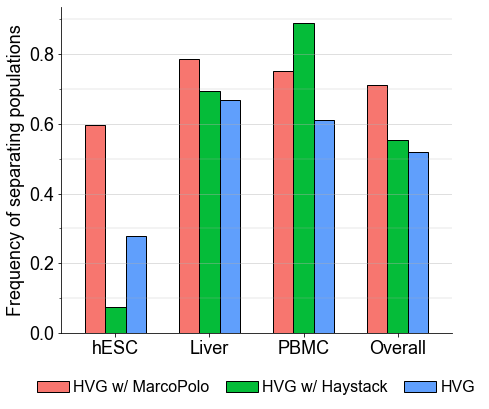

In [592]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(ari_cut_all_df.iloc[:,::]).plot.bar(width=0.65,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
#leg=fig_sub1.legend(loc='upper left',bbox_to_anchor=(0,-0.1),fontsize=16)

fig_sub1.set_ylabel('Frequency of separating populations')

fig_sub1.set_yticks(np.arange(0,1,0.1),minor=True)
fig_sub1.yaxis.grid(True,which='minor',linewidth=0.4,alpha=0.7)

fig_sub1.set_yticks(np.arange(0,1,0.1),minor=True)
fig_sub1.yaxis.grid(True,which='major',linewidth=0.8,alpha=0.5)

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

leg=fig_sub1.legend(loc='upper left',bbox_to_anchor=(-0.1,-0.1),fontsize=16,ncol=3,columnspacing=1,handletextpad=0.3)

In [594]:
fig.savefig('pub/robustness.png', bbox_inches='tight')
fig.savefig('pub/robustness.jpg', bbox_inches='tight')
fig.savefig('pub/robustness.svg', bbox_inches='tight')

In [ ]:
ari_result

In [ ]:
ari_cut_all={}
for dataset_name in dataset_name_all:
    ari_result=result_all[dataset_name_mapper(dataset_name)][1]
    
    thres=np.mean(ari_result.values.flatten())
    thres_rare=np.mean(ari_rare_result.values.flatten())
    
    print(dataset_name,thres,thres_rare)
    ari_cut=ari_result#((ari_result>thres).sum(axis=0)/(~ari_result.isnull()).sum(axis=0))
    #ari_rare_cut=((ari_rare_result>thres_rare).sum(axis=0)/(~ari_rare_result.isnull()).sum(axis=0))    
    
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={
        
    'w/   MarcoPolo':ari_cut.iloc[:,ari_cut.columns.str.contains('MarcoPolo')].values.flatten().mean(),
    'w/   Haystack':ari_cut.iloc[:,ari_cut.columns.str.contains('ht')].values.flatten().mean(),
    'w/o MarcoPolo':ari_cut.iloc[:,(~ari_cut.columns.str.contains('ht'))&(~ari_cut.columns.contains('MarcoPolo'))].values.flatten().mean()
        
}

In [ ]:
ari_cut

In [ ]:
pd.DataFrame(ari_cut_all).T

In [ ]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(pd.DataFrame(ari_cut_all).T.iloc[:,::-1]*100).plot.bar(width=0.35,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
leg=fig_sub1.legend(loc='upper right',bbox_to_anchor=(1.02,1),fontsize=16)
fig_sub1.set_ylabel('Probability (%)')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

In [ ]:
ari_cut_all={}
for dataset_name in dataset_name_all[1:2]:
    ari_result=result_all[dataset_name_mapper(dataset_name)][1]
    ari_result=ari_result.iloc[:,~ari_result.columns.str.contains('ht')]
    
    thres=np.mean(ari_result.values.flatten())
    
    print(dataset_name,thres)
    ari_cut=((ari_result>thres).sum(axis=0)/(~ari_result.isnull()).sum(axis=0))
    #ari_rare_cut=((ari_rare_result>thres_rare).sum(axis=0)/(~ari_rare_result.isnull()).sum(axis=0))    
    
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={
        
    'w/   MarcoPolo':ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean(),
    #'w/   Haystack':ari_cut.loc[ari_cut.index.str.contains('ht')].mean(),
    'w/o MarcoPolo':ari_cut.loc[(~ari_cut.index.str.contains('ht'))&(~ari_cut.index.str.contains('MarcoPolo'))].mean()
        
}

In [ ]:
pd.DataFrame(ari_cut_all).T

In [ ]:
#result_all[dataset_name_mapper('HumanLiver_filtered')][1]
ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')]

In [ ]:
#result_all[dataset_name_mapper('HumanLiver_filtered')][1]
ari_cut.loc[~ari_cut.index.str.contains('MarcoPolo')]

In [ ]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_seq_2_pink)

In [ ]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(pd.DataFrame(ari_cut_all).T.iloc[:,::-1]*100).plot.bar(width=0.35,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
leg=fig_sub1.legend(loc='upper right',bbox_to_anchor=(1.02,1),fontsize=16)
fig_sub1.set_ylabel('Probability (%)')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

In [ ]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(pd.DataFrame(ari_cut_all).T.iloc[:,::-1]*100).plot.bar(width=0.45,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
leg=fig_sub1.legend(loc='upper right',bbox_to_anchor=(1.02,1),fontsize=16)
fig_sub1.set_ylabel('Probability (%)')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

In [ ]:
np.quantile

In [ ]:
ari_rare_result.median(axis=0)

In [ ]:
ari_rare_result

In [ ]:
ari_rare_cut

In [ ]:
ari_cut_all={}
for dataset_name in dataset_name_all:
    ari_cut=result_all[dataset_name_mapper(dataset_name)][3]
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={'w/   MarcoPolo':ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean(),
                                                    'w/o MarcoPolo':ari_cut.loc[~ari_cut.index.str.contains('MarcoPolo')].mean()
                                                    }

In [ ]:
ari_cut_all

In [ ]:
ari_cut.iloc[:,ari_cut.columns.str.contains('MarcoPolo')].values.flatten().mean()

In [ ]:
ari_cut_all={}
for dataset_name in dataset_name_all[:]:
    ari_cut=result_all[dataset_name_mapper(dataset_name)][1]
    
    ari_cut_all[dataset_name_mapper(dataset_name)]={
    'w/   MarcoPolo':ari_cut.iloc[:,ari_cut.columns.str.contains('MarcoPolo')].values.flatten().mean(),
    'w/   Haystack':ari_cut.iloc[:,ari_cut.columns.str.contains('ht')].values.flatten().mean(),
    'w/o MarcoPolo':ari_cut.iloc[:,(~ari_cut.columns.str.contains('ht'))&(~ari_cut.columns.str.contains('MarcoPolo'))].values.flatten().mean()
        
}

In [ ]:
ari_cut_all

In [ ]:
plt.rcParams["axes.prop_cycle"]=cycler('color',color_seq_2_pink)

In [ ]:
ari_cut_all

In [ ]:
pd.DataFrame(ari_cut_all)

In [ ]:
fig = plt.figure(figsize=(7,6)) 
fig_sub1=fig.add_subplot()
(pd.DataFrame(ari_cut_all).T.iloc[:,::-1]*100).plot.bar(width=0.45,rot=0,linewidth=1,edgecolor=(0,0,0,1),ax=fig_sub1)
#fig_sub1.yaxis.grid(True,linewidth=0.3,alpha=0.8)
leg=fig_sub1.legend(loc='upper right',bbox_to_anchor=(1.02,1),fontsize=16)
fig_sub1.set_ylabel('Probability (%)')

fig_sub1.spines['right'].set_visible(False)
fig_sub1.spines['top'].set_visible(False)    

In [ ]:
fig.savefig('pub/robustness.png', bbox_inches='tight')
fig.savefig('pub/robustness.svg', bbox_inches='tight')

# New Marker

In [92]:
import MarcoPolo.QQscore as QQ

In [93]:
gamma_argmax_dict={}
exp_data_dict={}
exp_data_row_dict={}
exp_data_col_dict={}
exp_data_meta_dict={}

for idx,dataset_name in enumerate(dataset_name_all):
    path='datasets/extract/{}'.format(dataset_name)
    path  
    
    exp_data=mmread('{}.data.counts.mm'.format(path)).toarray().astype(float)
    with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    assert exp_data.shape==(len(exp_data_row),len(exp_data_col))
    assert len(set(exp_data_row))==len(exp_data_row)
    assert len(set(exp_data_col))==len(exp_data_col)            
    
    exp_data_meta=pd.read_csv('{}.metadatacol.tsv'.format(path),sep='\t')
    
    
    result_list,gamma_list_list=QQ.read_QQscore(path,[1,mode])

    gamma_list=gamma_list_list[-1]    

    gamma_argmax_list=QQ.gamma_list_exp_data_to_gamma_argmax_list(gamma_list,exp_data)#gamma_argmax_list=QQ.gamma_list_to_gamma_argmax_list(gamma_list)
    gamma_argmax_list,gamma_argmax_list.shape  
    gamma_argmax_dict[dataset_name]=gamma_argmax_list
    exp_data_dict[dataset_name]=exp_data
    exp_data_row_dict[dataset_name]=exp_data_row
    exp_data_col_dict[dataset_name]=exp_data_col
    exp_data_meta_dict[dataset_name]=exp_data_meta

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid va

In [673]:
"""
unique_genes={0:{'dataset_name':'HumanLiver_filtered','name':'KLRB1','Symbol':'KLRB1','on':'MarcoPolo'},
              1:{'dataset_name':'HumanLiver_filtered','name':'KLRB1','Symbol':'KLRB1','on':'Haystack'},
             }              
             

unique_genes={0:{'dataset_name':'HumanLiver_filtered','name':'GNLY','Symbol':'GNLY','on':'MarcoPolo'},
              1:{'dataset_name':'HumanLiver_filtered','name':'GNLY','Symbol':'GNLY','on':'Haystack'},
             }                    

#SCL
unique_genes={0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000185070','Symbol':'FLRT2','on':'MarcoPolo'},
              1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000185070','Symbol':'FLRT2','on':'Haystack'},
             }                   

#Para
unique_genes={0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000121966','Symbol':'CXCR4','on':'MarcoPolo'},
              1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000121966','Symbol':'CXCR4','on':'Haystack'},
             }              

#MPS
unique_genes={0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000280623','Symbol':'PCAT14','on':'MarcoPolo'},
              1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000280623','Symbol':'PCAT14','on':'Haystack'},
             }   

#laternal mesoderm
unique_genes={0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000136698','Symbol':'CFC1','on':'MarcoPolo'},
              1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000136698','Symbol':'CFC1','on':'Haystack'},
             }   



unique_genes={0:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000227507','Symbol':'LTB','on':'MarcoPolo'},
              1:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000227507','Symbol':'LTB','on':'Haystack'},
             }              
unique_genes={0:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000051523','Symbol':'CYBA','on':'MarcoPolo'},
              1:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000051523','Symbol':'CYBA','on':'Haystack'},
             }   
unique_genes={0:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000196154','Symbol':'S100A4','on':'MarcoPolo'},
              1:{'dataset_name':'Zhengmix8eq_filtered','name':'ENSG00000196154','Symbol':'S100A4','on':'Haystack'},
             }  
"""

"""
5 ENSG00000185070 Sclrtm    # 134 FOXD2 ENSG00000186564
16 ENSG00000265992 hESC    # 92 
33 ENSG00000280623 MPS   # x
81 ENSG00000182718 ESMT ANXA2  # 148	MEOX1


57 ENSG00000075388 APS # 34	GDF3
66 ENSG00000164318 DLL1pPXM # 37	CITED1
"""
unique_genes={
    0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000185070','Symbol':'FLRT2'},
    1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000265992','Symbol':'ESRG'},    
    2:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000280623','Symbol':'PCAT14'},
    3:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000182718','Symbol':'ANXA2'},  
}
unique_genes={
    0:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000185070','Symbol':'FLRT2','phenoid':'Sclrtm','rank':'5th'},
    1:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000265992','Symbol':'ESRG','phenoid':'hESC','rank':'16th'},    
    #2:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000280623','Symbol':'PCAT14','phenoid':'MPS','rank':'33rd'},
    2:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000156574','Symbol':'NODAL','phenoid':'MPS','rank':'11st'},
    3:{'dataset_name':'Kohinbulk_filtered','name':'ENSG00000182718','Symbol':'ANXA2','phenoid':'ESMT','rank':'81st'},
    
}

In [674]:
from scipy.stats import poisson

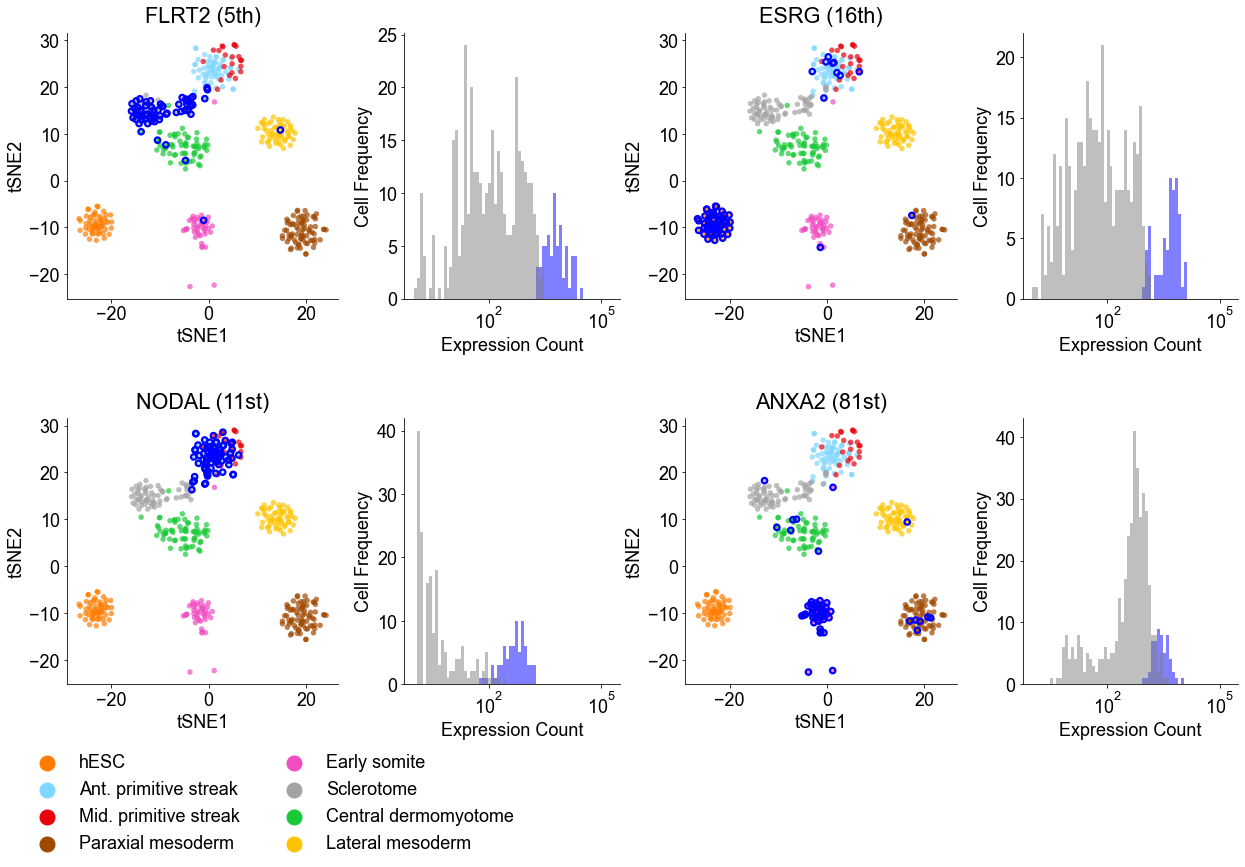

In [675]:
fig = plt.figure(figsize=(5+1+4+1+5+1+4+1,5+2+5+1))
gs=fig.add_gridspec(5+2+5+1,5+1+4+1+5+1+4+1)

for idx,(_,gene_select) in enumerate(unique_genes.items()):
    dataset_name=gene_select['dataset_name']
    gene_name=gene_select['name']
    gene_symbol=gene_select['Symbol']
    phenoid=gene_select['phenoid']
    rank=gene_select['rank']
    
    
    exp_data_meta_transformed=exp_data_meta_dict[dataset_name]
    exp_data=exp_data_dict[dataset_name]
    exp_data_row=exp_data_row_dict[dataset_name]
    gamma_argmax_list=gamma_argmax_dict[dataset_name]
    
    if idx==0:
        idx1,idx2=0,0
    elif idx==1:
        idx1,idx2=0,11
    elif idx==2:
        idx1,idx2=7,0
    elif idx==3:
        idx1,idx2=7,11
    
    fig_sub1=fig.add_subplot(gs[idx1:idx1+5,idx2:idx2+5])
    fig_sub2=fig.add_subplot(gs[idx1:idx1+5,idx2+6:idx2+4+6])
    
    # 5 7
    
    
    
    plot_value=exp_data_meta_transformed['phenoid']
    plot_value_unique=plot_value.unique().tolist()
    plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))       
    
    
    if dataset_name=='Kohinbulk_filtered':
        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        palette[9][0]=0.5
        #palette*=0.9
        palette=palette[[1,9,3,5,6,7,2,8]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #ns.palplot(palette)       

    elif dataset_name=='HumanLiver_filtered':
        palette = np.array(sns.color_palette("Paired",len(plot_value_unique)+2)[2::])
        palette[8]*=0.8
        #palette*=0.9
        palette=palette[[0,2,4,6,8,10,3,1,5,7,9]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)

    elif dataset_name=='Zhengmix8eq_filtered':

        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        #palette[8]*=0.8
        #palette*=0.9
        palette=palette[[1,9,5,3,2,8,6,7]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)       
    
    
    s=30
    sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)), data=exp_data_meta_transformed,
                    palette=palette,
                    ax=fig_sub1,alpha=0.7,edgecolor="None",
                    s=s
                   )
    
    
    gene_select_on=gamma_argmax_list[exp_data_row.index(gene_select['name'])]==0
    #gene_select_on=exp_data_dict[dataset_name][exp_data_row.index(gene_select['name'])]>1
    
    
    sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gene_select_on],
                    ax=fig_sub1,
                    edgecolor=[0,0,1,1],
                    facecolors="None",
                    linewidth=2.2,
                    alpha=0.5 if dataset_name in ['HumanLiver_filtered'] else 1,
                    s=s
                   )
    
    gene_select_off=gamma_argmax_list[exp_data_row.index(gene_select['name'])]==1
    #gene_select_on=exp_data_dict[dataset_name][exp_data_row.index(gene_select['name'])]>1
    
    """
    sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gene_select_off],
                    ax=fig_sub1,
                    edgecolor='grey',
                    facecolors="None",
                    linewidths=1,
                    alpha=0.5 if dataset_name in ['HumanLiver_filtered'] else 1,
                    s=s
                   )    
    """
    
    
    #              )
    #fig_sub1.title.set_text('{} - {}'.format(gene_symbol,celltype_mapper(phenoid)))
    #fig_sub1.title.se
    
    
    fig_sub1.set_title(label='{} ({})'.format(gene_symbol,rank),pad=10)
    
    fig_sub1.set_xlabel('tSNE1')
    fig_sub1.set_ylabel('tSNE2')
    
    fig_sub1.spines['right'].set_visible(False)
    fig_sub1.spines['top'].set_visible(False)
    
    
    
    if idx!=2:
        fig_sub1.legend().remove()
    else:
        leg=fig_sub1.legend(loc='upper left',
                    #bbox_to_anchor=(0.45,-0.1),
                    bbox_to_anchor=(-0.2, -0.2),
                    ncol=2,
                    markerscale=2.5)
        
    data_on=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==0]    
    bins=[np.power(1.5,i) for i in range(37)]
    #bins=np.clip(bins,a_min=0,a_max=exp_data.max())
    bins=[np.power(1.2,i) for i in range(int(np.log(np.max(exp_data))/np.log(1.2)))]
    fig_sub2.hist(data_on,
                  alpha=0.5,
                    bins=bins,
                  color='blue'
                 )
    

    
    data_off=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==1]
    
    hist_bin=fig_sub2.hist(data_off,
                 alpha=0.5,
                 bins=bins,
                color='grey'
                 )
    """
    print(np.max(data_off))
    X = np.array([int(i) for i in hist_bin[1]])
    Y = poisson.pmf(X,np.mean(data_off))
    range_chek=(X>np.min(data_off)) & (X<np.max(data_off))
    X=X[range_chek]
    Y=Y[range_chek]
    
    fig_sub2.plot(X, len(data_off)*Y, linewidth=10)
    """
    
    
    fig_sub2.set_xscale('log')
    #fig_sub2.set_yscale('log')
    
        
    fig_sub2.set_xlabel('Expression Count')
    fig_sub2.set_ylabel('Cell Frequency')
    
    fig_sub2.spines['right'].set_visible(False)
    fig_sub2.spines['top'].set_visible(False)        
        
        
        

In [676]:
fig.savefig('pub/bimodality.png', bbox_inches='tight')
fig.savefig('pub/bimodality.jpg', bbox_inches='tight')
fig.savefig('pub/bimodality.svg', bbox_inches='tight')

# tSNE

In [276]:
dataset_name='Kohinbulk_filtered'

In [681]:
exp_data_meta_transformed=exp_data_meta_dict[dataset_name].copy()
exp_data=exp_data_dict[dataset_name]
exp_data_row=exp_data_row_dict[dataset_name]
gamma_argmax_list=gamma_argmax_dict[dataset_name]

gene_name='ENSG00000156574'
gene_symbol='NODAL'


gene_name='ENSG00000280623'
gene_symbol='PCAT14'
#:'ENSG00000280623','Symbol':'PCAT14'

In [682]:
'ENSG00000156574' in exp_data_row

True

In [683]:
gene_on=gamma_argmax_list[exp_data_row.index(gene_name)]==0

exp_data_meta_transformed['on-off']='Off'
exp_data_meta_transformed['on-off'][gene_on]='On'

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [684]:
robustness=pd.read_csv('datasets/extract/{}.clusteringrobustness.tsv'.format(dataset_name),sep='\t')
exp_data_meta_transformed['standard']=robustness['1000-vst-2']

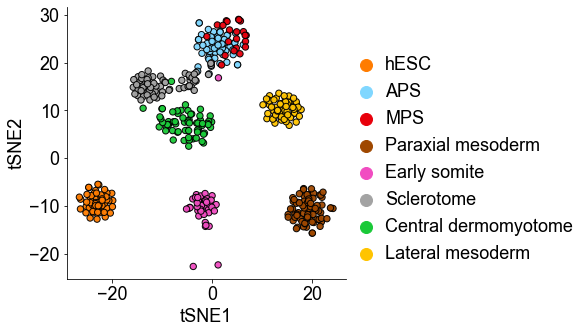

In [665]:
fig = plt.figure(figsize=(5,5))
fig_sub=fig.add_subplot()

palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
palette[9][0]=0.5
palette=palette[[1,9,3,5,6,7,2,8]] 

plot_value=exp_data_meta_transformed['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))     


sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(lambda x: celltype_mapper(x,True),plot_value.values)),
                data=exp_data_meta_transformed,
                palette=palette,
                ax=fig_sub,alpha=0.95,edgecolor="black",linewidth=1,
                s=40
               )



fig_sub.set_xlabel('tSNE1')
fig_sub.set_ylabel('tSNE2')

fig_sub.spines['right'].set_visible(False)
fig_sub.spines['top'].set_visible(False)

#fig_sub.set_xticks([])
#fig_sub.set_yticks([])

leg=fig_sub.legend(loc='lower left',
            bbox_to_anchor=(1,0.),
            handlelength=0.5,
            markerscale=2)  

In [668]:
newcoord=pd.read_csv('datasets/extract/Kohinbulk_filtered.tsne.vst.2000.tsv',sep='\t')
#newcoord['tSNE_2'][newcoord.index.str.contains('helper')]=newcoord['tSNE_2'][newcoord.index.str.contains('helper')]+40

assert np.all(exp_data_meta_transformed.index==newcoord.index)
exp_data_meta_transformed[['TSNE_1','TSNE_2']]=newcoord[['tSNE_1','tSNE_2']]    

In [669]:
exp_data_meta_transformed_sub=exp_data_meta_transformed[exp_data_meta_transformed['phenoid'].map(lambda x : x in ['APS','MPS'])]

In [670]:
color_qual_2

['#0DD9C4', '#F27E63']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data on 687.340106944195
data off 616.4500484478887


Text(-0.1, 1.0, 'd')

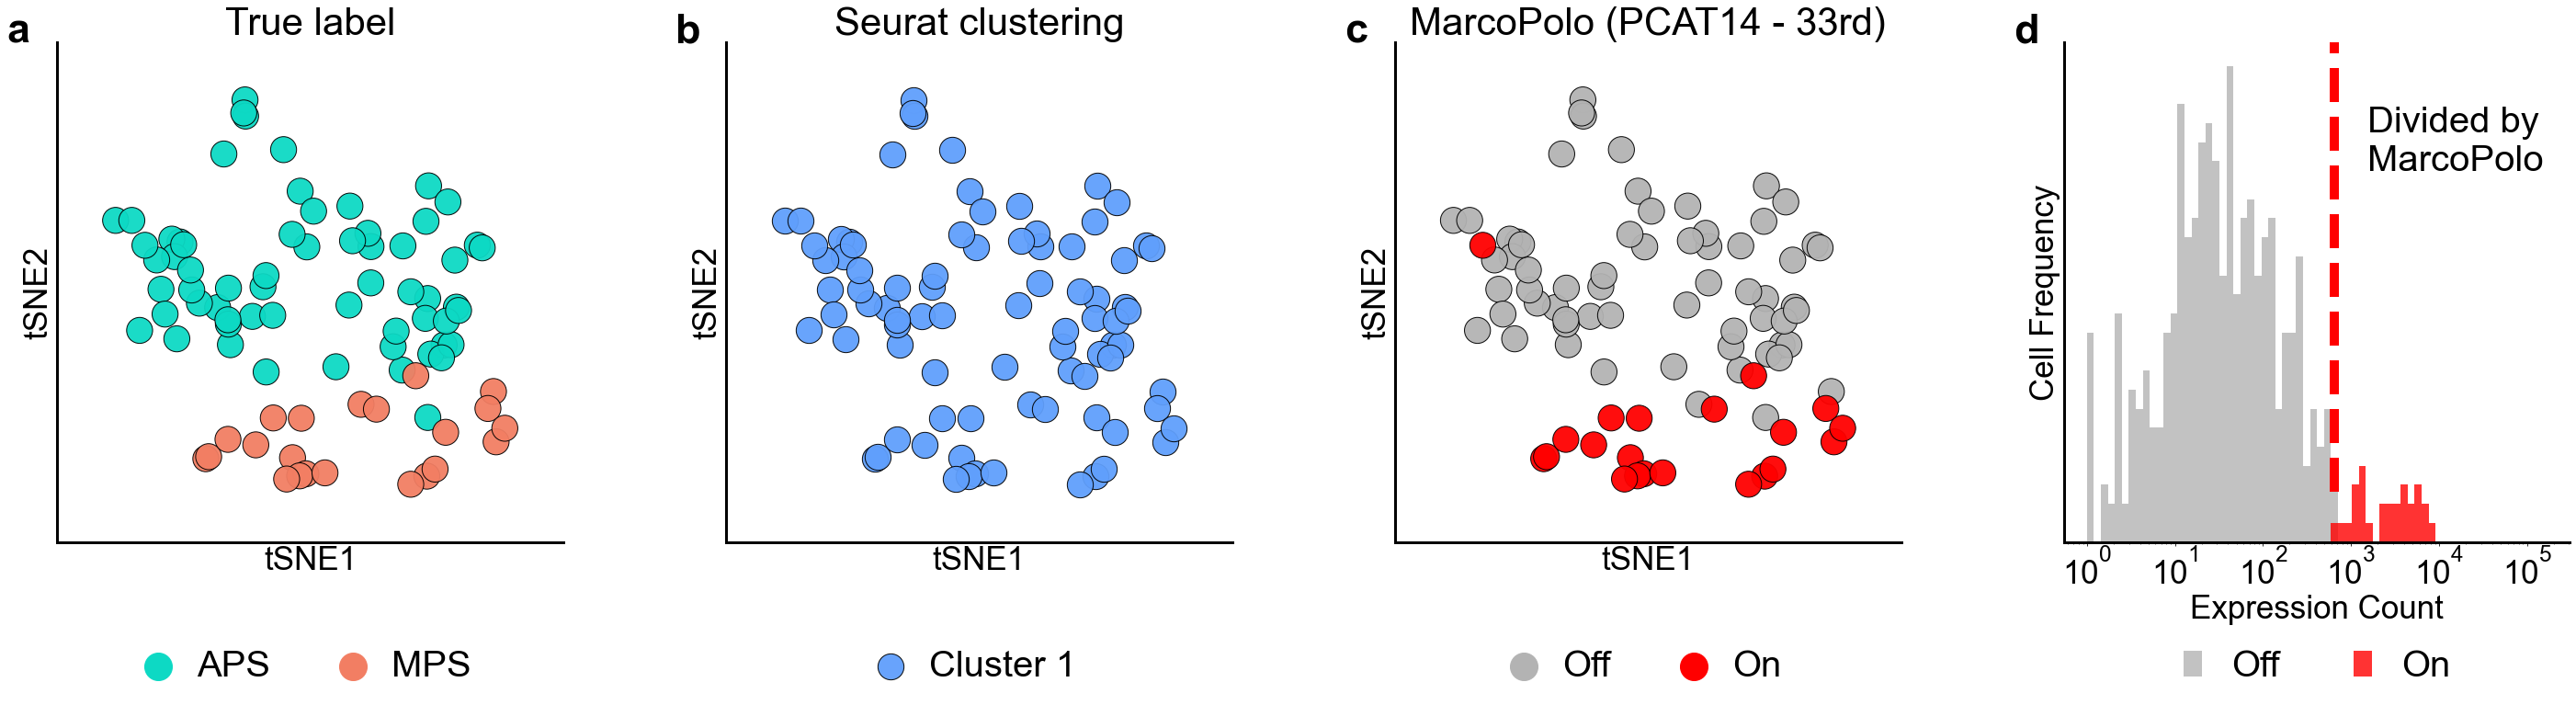

In [685]:
plt.rcParams["font.size"] = 35

fig = plt.figure(figsize=(10+10+10+10+3*3,10))
gs=fig.add_gridspec(10,10+10+10+10+3*3)

fig_true=fig.add_subplot(gs[0:10,0:10])

plot_value=exp_data_meta_transformed_sub['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))       



palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
palette[9][0]=0.5
palette=palette[[1,9,3,5,6,7,2,8]]     
palette=color_qual_2

s=800
sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(lambda x: celltype_mapper(x,True),plot_value.values)),
                data=exp_data_meta_transformed_sub,
                palette=palette,
                ax=fig_true,alpha=0.95,edgecolor="black",linewidth=1,
                s=s
               )

fig_true.set_xlabel('tSNE1')
fig_true.set_ylabel('tSNE2')

fig_true.spines['right'].set_visible(False)
fig_true.spines['top'].set_visible(False)

fig_true.set_xticks([])
fig_true.set_yticks([])

leg=fig_true.legend(loc='lower center',
            #bbox_to_anchor=(0.45,-0.1),
            bbox_to_anchor=(0.5, -0.35),
            handlelength=0.5,
            markerscale=5,
            ncol=2,
            fontsize=40)  


for axis in ['top','bottom','left','right']:
    fig_true.spines[axis].set_linewidth(3) 

fig_true.set_title('True label')


tsne_1=exp_data_meta_transformed_sub['TSNE_1']
fig_true.set_xlim([tsne_1.min()-(tsne_1.max()-tsne_1.min())*0.15,tsne_1.max()+(tsne_1.max()-tsne_1.min())*0.15])    
tsne_2=exp_data_meta_transformed_sub['TSNE_2']
fig_true.set_ylim([tsne_2.min()-(tsne_2.max()-tsne_2.min())*0.15,tsne_2.max()+(tsne_2.max()-tsne_2.min())*0.15])    





fig_standard=fig.add_subplot(gs[0:10,10+3:20+3])


#plot_value=exp_data_meta_transformed['on-off']
plot_value=exp_data_meta_transformed_sub['standard'].copy()

plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))   
print(plot_value_int)

s=800
sns.scatterplot(x="TSNE_1", y="TSNE_2",#hue=list(map(celltype_mapper,plot_value.values)),
                data=exp_data_meta_transformed_sub,
                #palette=palette,
                #color=[0.7,0.7,0.7,1],
                color=np.array(color_qual_3[2]),#*1.2,
                ax=fig_standard,alpha=0.95,edgecolor="black",linewidth=1,
                s=s,
                label='Cluster 1'
               )

fig_standard.set_xlabel('tSNE1')
fig_standard.set_ylabel('tSNE2')

fig_standard.spines['right'].set_visible(False)
fig_standard.spines['top'].set_visible(False)

fig_standard.set_xticks([])
fig_standard.set_yticks([])

#fig_standard.legend().remove()


for axis in ['top','bottom','left','right']:
    fig_standard.spines[axis].set_linewidth(3) 


fig_standard.set_title('Seurat clustering')

leg=fig_standard.legend(loc='lower center',
            #bbox_to_anchor=(0.45,-0.1),
            bbox_to_anchor=(0.5, -0.35),
            handlelength=0.5,
            markerscale=1,
            ncol=2,
            fontsize=40) 

tsne_1=exp_data_meta_transformed_sub['TSNE_1']
fig_standard.set_xlim([tsne_1.min()-(tsne_1.max()-tsne_1.min())*0.15,tsne_1.max()+(tsne_1.max()-tsne_1.min())*0.15])    
tsne_2=exp_data_meta_transformed_sub['TSNE_2']
fig_standard.set_ylim([tsne_2.min()-(tsne_2.max()-tsne_2.min())*0.15,tsne_2.max()+(tsne_2.max()-tsne_2.min())*0.15])    







fig_MarcoPolo=fig.add_subplot(gs[0:10,20+6:30+6])

plot_value=exp_data_meta_transformed_sub['on-off']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))   

s=800
sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)),
                data=exp_data_meta_transformed_sub,
                palette=[[0.7,0.7,0.7,1],
                         [1,0,0,1],
                        ],
                ax=fig_MarcoPolo,alpha=0.95,edgecolor="black",linewidth=1,
                s=s,
               )

fig_MarcoPolo.set_xlabel('tSNE1')
fig_MarcoPolo.set_ylabel('tSNE2')

fig_MarcoPolo.spines['right'].set_visible(False)
fig_MarcoPolo.spines['top'].set_visible(False)

fig_MarcoPolo.set_xticks([])
fig_MarcoPolo.set_yticks([])

fig_MarcoPolo.legend().remove()


for axis in ['top','bottom','left','right']:
    fig_MarcoPolo.spines[axis].set_linewidth(3) 
    
    
    
#fig_MarcoPolo.set_title('MarcoPolo (NODAL-11st)') 
fig_MarcoPolo.set_title('MarcoPolo (PCAT14 - 33rd)') 
#gene_name='ENSG00000280623'
#gene_symbol=''
tsne_1=exp_data_meta_transformed_sub['TSNE_1']
fig_MarcoPolo.set_xlim([tsne_1.min()-(tsne_1.max()-tsne_1.min())*0.15,tsne_1.max()+(tsne_1.max()-tsne_1.min())*0.15])    
tsne_2=exp_data_meta_transformed_sub['TSNE_2']
fig_MarcoPolo.set_ylim([tsne_2.min()-(tsne_2.max()-tsne_2.min())*0.15,tsne_2.max()+(tsne_2.max()-tsne_2.min())*0.15])    

leg=fig_MarcoPolo.legend(loc='lower center',
            #bbox_to_anchor=(0.45,-0.1),
            bbox_to_anchor=(0.5, -0.35),
            handlelength=0.5,
            markerscale=5,
            ncol=2,                         
            fontsize=40,                     
                        
                        )    
    
    
    
    
fig_dist=fig.add_subplot(gs[0:10,30+9:40+9])






bins=[np.power(1.5,i) for i in range(37)]
#bins=np.clip(bins,a_min=0,a_max=exp_data.max())
bins=[np.power(1.2,i) for i in range(int(np.log(np.max(exp_data))/np.log(1.2)))]
"""
data_APS=exp_data[exp_data_row.index(gene_name)][exp_data_meta_transformed['phenoid']=='APS']    
fig_dist.hist(data_APS,
              alpha=0.8,
              bins=bins,
              color=palette[0],
              label='APS'
             )
"""
"""
data_others=exp_data[exp_data_row.index(gene_name)][list(exp_data_meta_transformed['phenoid'].map(lambda x: x not in ['APS','MPS']))]    
hist_bin=fig_dist.hist(data_others,
             alpha=0.5,
             bins=bins,
            color=(0.8,0.8,0.8,0.3),
            label='Others'
             )
"""
"""
#
data_MPS=exp_data[exp_data_row.index(gene_name)][exp_data_meta_transformed['phenoid']=='MPS']    
hist_bin=fig_dist.hist(data_MPS,
             alpha=0.8,
             bins=bins,
            color=palette[1],
            label='MPS'
             )
"""

data_off=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==1]
hist_bin=fig_dist.hist(data_off,
             alpha=0.8,
             bins=bins,
            color=[0.7,0.7,0.7,1],
            label='Off'
             )

data_off=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==0]
hist_bin=fig_dist.hist(data_off,
             alpha=0.8,
             bins=bins,
            color=[1,0,0,1],
            label='On'
             )

#b=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==0]    
data_on=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==0]
data_off=exp_data[exp_data_row.index(gene_name)][gamma_argmax_list[exp_data_row.index(gene_name)]==1]

thres=(min(data_on)+max(data_off))/2
#thres=(min(data_on))
print('data on',min(data_on))
print('data off',max(data_off))

fig_dist.axvline(x=thres,ymin=0.1,ymax=1,c=(1,0,0,1),linestyle='--',linewidth=10,alpha=1)
#fig_dist.text(thres-250,25, "Divided by \nMarcoPolo", verticalalignment='center',fontsize=40,transform=fig_dist.transAxes)
fig_dist.text(0.6,0.8, "Divided by \nMarcoPolo", verticalalignment='center',fontsize=40,transform=fig_dist.transAxes)

fig_dist.set_xscale('log')


fig_dist.set_xlabel('Expression Count')
fig_dist.set_ylabel('Cell Frequency')

fig_dist.spines['right'].set_visible(False)
fig_dist.spines['top'].set_visible(False)

#fig_dist.set_xticks([])
fig_dist.set_yticks([])




for axis in ['top','bottom','left','right']:
    fig_dist.spines[axis].set_linewidth(3)     
    
    
leg=fig_dist.legend(loc='lower center',
            #bbox_to_anchor=(0.45,-0.1),
            bbox_to_anchor=(0.5, -0.35),
            handlelength=0.5,
            markerscale=15,
            ncol=2,
            fontsize=40)      
   
    
    

plt.rcParams["font.size"] = 18


fig_true.text(-0.1, 1.0, 'a', fontproperties=font_prop(bold=True,size=45), transform=fig_true.transAxes)
fig_standard.text(-0.1, 1.0, 'b', fontproperties=font_prop(bold=True,size=45), transform=fig_standard.transAxes)
fig_MarcoPolo.text(-0.1, 1.0, 'c', fontproperties=font_prop(bold=True,size=45), transform=fig_MarcoPolo.transAxes)
fig_dist.text(-0.1, 1.0, 'd', fontproperties=font_prop(bold=True,size=45), transform=fig_dist.transAxes)





In [686]:
fig.savefig('pub/label.jpg', bbox_inches='tight')
fig.savefig('pub/label.png', bbox_inches='tight')
fig.savefig('pub/label.svg', bbox_inches='tight')

In [572]:
min(data_on),max(data_off)

(687.340106944195, 616.4500484478887)

In [566]:
legend1=fig_legend.legend(
[plt.scatter([],[], marker = 's', s=250, c=row['color'], edgecolor='black', label = row['category']) for (idx,row) in category_color_df.iterrows()],
[row['category'] for (idx,row) in category_color_df.iterrows()],
loc='upper left',bbox_to_anchor=(0, 0)
)

NameError: name 'fig_legend' is not defined

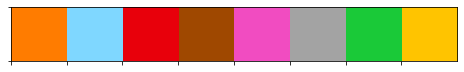

In [389]:
sns.palplot(palette)  

In [342]:
#list(map(celltype_mapper,plot_value.values))

<AxesSubplot:xlabel='TSNE_1', ylabel='TSNE_2'>

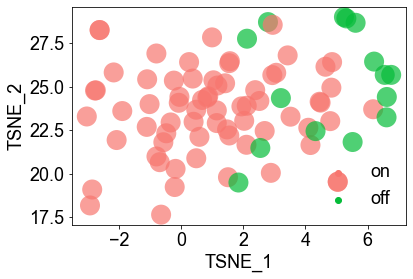

In [343]:
sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)),
                data=exp_data_meta_transformed_sub,
                #palette=palette,
                alpha=0.7,edgecolor="None",
                s=s
               )

In [301]:
exp_data_meta_transformed['standard']

SRR3952323    5
SRR3952325    5
SRR3952326    5
SRR3952327    5
SRR3952328    5
             ..
SRR3952828    4
SRR3952829    4
SRR3952830    4
SRR3952831    4
SRR3952832    4
Name: standard, Length: 446, dtype: int64

In [ ]:
sns.palplot(palette)       

In [ ]:
hist_bin[1]

In [ ]:
Y

In [ ]:
#X

In [ ]:
X, [int(i) for i in poisson.pmf(X,np.mean(data_on))]

In [ ]:
X

In [ ]:
np.log(np.max(exp_data),3))

In [ ]:
np.log?

In [ ]:
hist_bin[1][0]

In [ ]:
X = np.arange( 1200, 1450 )
plt.plot( X, poisson.pmf(X,1375))#, 'r-' )

In [ ]:
X

In [ ]:
X = np.arange( 1200, 1450 )
plt.plot( X, poisson.pmf(X,1375))#, 'r-' )

In [ ]:
data_on=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [ ]:
poisson.pmf(np.arange(np.mean(data_on),np.max(data_on)),np.mean(data_on))[000]

In [ ]:
plt.plot(np.arange(np.mean(data_on),np.max(data_on)),poisson.pmf(np.arange(np.mean(data_on),np.max(data_on)),np.mean(data_on)))

In [ ]:
from scipy.special import factorial
data_on_mean=np.mean(data_on)
[(np.power(data_on_mean, int(i)) * np.exp(-data_on_mean)) / factorial(int(i)) for i in ,100)]

In [ ]:
data_on

In [ ]:
bins

In [ ]:
2//2,%2

In [ ]:
for idx,(dataset_name,gene_select) in enumerate(unique_genes.items()):
    print(idx,dataset_name)

In [ ]:
fig = plt.figure(figsize=(7+1,9*3+1)) 
gs=fig.add_gridspec(9*3+1,7+1)

for idx,(_,gene_select) in enumerate(unique_genes.items()):
    dataset_name=gene_select['dataset_name']
    
    
    print(idx,dataset_name)
    
    
    fig_sub1=fig.add_subplot(gs[9*idx:9*idx+5,0:7])
    
    path='datasets/extract/{}'.format(dataset_name)
    path    
    
    with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    assert len(set(exp_data_row))==len(exp_data_row)
    assert len(set(exp_data_col))==len(exp_data_col)                
    exp_data_meta=pd.read_csv('{}.metadatacol.tsv'.format(path),sep='\t')

    exp_data_meta_transformed=exp_data_meta.copy()    
    
    
    if dataset_name=='Zhengmix8eq_filtered':
        newcoord=pd.read_csv('datasets/extract/Zhengmix8eq.tsne.MarcoPolodisp.2000.tsv',sep='\t')
        #newcoord['tSNE_2'][newcoord.index.str.contains('helper')]=newcoord['tSNE_2'][newcoord.index.str.contains('helper')]+40

        assert np.all(exp_data_meta_transformed.index==newcoord.index)
        exp_data_meta_transformed[['TSNE_1','TSNE_2']]=newcoord[['tSNE_1','tSNE_2']]    
    
    
    
    record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])

    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        score=load_score(dataset_name,method) 

        record_list.append({
            'Method':method_mapper(method),
            'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[gene_select['name']])
        })
        
    gene_rank_df=pd.DataFrame(record_list)
    gene_rank_df    


    plot_value=exp_data_meta_transformed['phenoid']
    plot_value_unique=plot_value.unique().tolist()
    plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))       
    
    
    if dataset_name=='Kohinbulk_filtered':
        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        palette[9][0]=0.5
        #palette*=0.9
        palette=palette[[1,9,3,5,6,7,2,8]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #ns.palplot(palette)       

    elif dataset_name=='HumanLiver_filtered':
        palette = np.array(sns.color_palette("Paired",len(plot_value_unique)+2)[2::])
        palette[8]*=0.8
        #palette*=0.9
        palette=palette[[0,2,4,6,8,10,3,1,5,7,9]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)

    elif dataset_name=='Zhengmix8eq_filtered':

        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        #palette[8]*=0.8
        #palette*=0.9
        palette=palette[[1,9,5,3,2,8,6,7]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)     
    
    



         

    s=30
    sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)), data=exp_data_meta_transformed,
                    palette=palette,
                   ax=fig_sub1,alpha=0.7,edgecolor="None",
                    s=s
                   )
    
    if gene_select['on']=='MarcoPolo':
        gene_select_on=gamma_argmax_dict[dataset_name][exp_data_row.index(gene_select['name'])]==0
    elif gene_select['on']=='Haystack':
        gene_select_on=exp_data_dict[dataset_name][exp_data_row.index(gene_select['name'])]>1
    
    
    sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gene_select_on],
                    ax=fig_sub1,
                    edgecolor=[0,0,1,1],
                    facecolors="None",
                    linewidths=3,
                    alpha=0.5 if dataset_name in ['HumanLiver_filtered'] else 1,
                    s=s
                   )

    #pd.plotting.table(ax=fig_sub1,data=gene_rank_df)

    cell_text = []
    for row in range(len(gene_rank_df)):
        cell_text.append(gene_rank_df.iloc[row])

    tab=fig_sub1.table(cellText=cell_text, colLabels=gene_rank_df.columns, 
                    colWidths=[0.2,0.05],
                    loc='right',
                  bbox = [2,0,0.5,1]
                  #bbox = [0,0,-1,-1]
                 )

    #[a.axis("off") for a in ax]
    tab.auto_set_font_size(False)
    tab.set_fontsize(plt.rcParams['font.size'])

    tab.auto_set_column_width(col=list(range(len(gene_rank_df.columns))))



    leg=fig_sub1.legend(loc='upper left',
                        #bbox_to_anchor=(0.45,-0.1),
                        bbox_to_anchor=(-0.05, -0.2),
                        ncol=2,
                        markerscale=2.5)

    for lh in leg.legendHandles: 
        lh.set_alpha(0.7)


    fig_sub1.title.set_text('{} ({}, {}{})'.format(dataset_name_mapper(dataset_name),
                                                    gene_select['Symbol'],
                                                    gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank'],
                                                  'rd' if gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank']%10==3 else 'th',
                                                  ))
    fig_sub1.set_xlabel('tSNE1')
    fig_sub1.set_ylabel('tSNE2')

    fig_sub1.spines['right'].set_visible(False)
    fig_sub1.spines['top'].set_visible(False)         
    

In [ ]:
len(gamma_argmax_dict[dataset_name][exp_data_row.index('ENSG00000168542')]==0)

In [ ]:
#gene_name='ENSG00000164318'
gene_name='ENSG00000182718'

In [ ]:
plt.hist(exp_data_dict[dataset_name][exp_data_row.index(gene_name)][gamma_argmax_dict[dataset_name][exp_data_row.index(gene_name)]==0])

In [ ]:
exp_data_dict[dataset_name][exp_data_row.index(gene_name)][gamma_argmax_dict[dataset_name][exp_data_row.index(gene_name)]==0]

In [ ]:
plt.hist(exp_data_dict[dataset_name][exp_data_row.index(gene_name)][gamma_argmax_dict[dataset_name][exp_data_row.index(gene_name)]==1])

In [ ]:
exp_data_dict[dataset_name][exp_data_row.index(gene_name)][gamma_argmax_dict[dataset_name][exp_data_row.index(gene_name)]==1]

In [ ]:
sum((gamma_argmax_dict[dataset_name][exp_data_row.index(gene_select['name'])]==0)\
!=(exp_data_dict[dataset_name][exp_data_row.index(gene_select['name'])]>1))

In [ ]:
fig = plt.figure(figsize=(7+1,9*3+1)) 
gs=fig.add_gridspec(9*3+1,7+1)


    
    
    
for idx,dataset_name in enumerate():

    fig_sub1=fig.add_subplot(gs[9*idx:9*idx+5,0:7])
    
    path='datasets/extract/{}'.format(dataset_name)
    path    
    
    with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    assert len(set(exp_data_row))==len(exp_data_row)
    assert len(set(exp_data_col))==len(exp_data_col)                
    exp_data_meta=pd.read_csv('{}.metadatacol.tsv'.format(path),sep='\t')






    #exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta)

    exp_data_meta_transformed=exp_data_meta.copy()

    if 'HVGMarcoPolocoord' in dataset_name:
        newcoord=pd.read_csv('datasets/extract/{}.UMAP.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')

        assert np.all(exp_data_meta_transformed.index==newcoord.index)

        exp_data_meta_transformed[['tSNE_1','tSNE_2']]=newcoord[['UMAP_1','UMAP_2']]

    if 'HVGMarcoPololabel' in dataset_name:
        newlabel=pd.read_csv('datasets/extract/{}.metadatacol.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')

        assert np.all(exp_data_meta_transformed.index==newlabel.index)
        exp_data_meta_transformed['phenoid']=newlabel['seurat_clusters']

    if 'separate_coord' in dataset_name:
        exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta_transformed)  

    if dataset_name=='Zhengmix8eq_filtered':
        newcoord=pd.read_csv('datasets/extract/Zhengmix8eq.tsne.MarcoPolodisp.2000.tsv',sep='\t')
        #newcoord['tSNE_2'][newcoord.index.str.contains('helper')]=newcoord['tSNE_2'][newcoord.index.str.contains('helper')]+40

        assert np.all(exp_data_meta_transformed.index==newcoord.index)
        exp_data_meta_transformed[['TSNE_1','TSNE_2']]=newcoord[['tSNE_1','tSNE_2']]



    record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])

    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        score=load_score(dataset_name,method) 
        if 'seurat' in method:
            #resolution=method.split(',')[1]
            #deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
            #deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,resolution),sep='\t',index_col=0)
            #print(deg_result[deg_result['gene']==gene_name])
            record_list.append({
                'Method':method_mapper(method),
                'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
            })
        else:
            record_list.append({
                'Method':method_mapper(method),
                'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
            })
    gene_rank_df=pd.DataFrame(record_list)
    gene_rank_df    


    plot_value=exp_data_meta_transformed['phenoid']
    plot_value_unique=plot_value.unique().tolist()
    plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))   
    


    if dataset_name=='Kohinbulk_filtered':
        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        palette[9][0]=0.5
        #palette*=0.9
        palette=palette[[1,9,3,5,6,7,2,8]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #ns.palplot(palette)       

    elif dataset_name=='HumanLiver_filtered':
        palette = np.array(sns.color_palette("Paired",len(plot_value_unique)+2)[2::])
        palette[8]*=0.8
        #palette*=0.9
        palette=palette[[0,2,4,6,8,10,3,1,5,7,9]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)

    elif dataset_name=='Zhengmix8eq_filtered':

        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        #palette[8]*=0.8
        #palette*=0.9
        palette=palette[[1,9,5,3,2,8,6,7]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette) 






         

    s=30
    sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)), data=exp_data_meta_transformed,
                    palette=palette,
                   ax=fig_sub1,alpha=0.7,edgecolor="None",
                    s=s
                   )

    sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gamma_argmax_dict[dataset_name][exp_data_row.index(unique_genes[dataset_name]['name'])]==0],
                    ax=fig_sub1,
                    edgecolor=[0,0,1,1],
                    facecolors="None",
                    linewidths=3,
                    alpha=0.5 if dataset_name in ['HumanLiver_filtered'] else 1,
                    s=s
                   )

    #pd.plotting.table(ax=fig_sub1,data=gene_rank_df)

    cell_text = []
    for row in range(len(gene_rank_df)):
        cell_text.append(gene_rank_df.iloc[row])

    tab=fig_sub1.table(cellText=cell_text, colLabels=gene_rank_df.columns, 
                    colWidths=[0.2,0.05],
                    loc='right',
                  bbox = [2,0,0.5,1]
                  #bbox = [0,0,-1,-1]
                 )

    #[a.axis("off") for a in ax]
    tab.auto_set_font_size(False)
    tab.set_fontsize(plt.rcParams['font.size'])

    tab.auto_set_column_width(col=list(range(len(gene_rank_df.columns))))



    leg=fig_sub1.legend(loc='upper left',
                        #bbox_to_anchor=(0.45,-0.1),
                        bbox_to_anchor=(-0.05, -0.2),
                        ncol=2,
                        markerscale=2.5)

    for lh in leg.legendHandles: 
        lh.set_alpha(0.7)


    fig_sub1.title.set_text('{} ({}, {}{})'.format(dataset_name_mapper(dataset_name),
                                                    unique_genes[dataset_name]['Symbol'],
                                                    gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank'],
                                                  'rd' if gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank']%10==3 else 'th',
                                                  ))
    fig_sub1.set_xlabel('tSNE1')
    fig_sub1.set_ylabel('tSNE2')

    fig_sub1.spines['right'].set_visible(False)
    fig_sub1.spines['top'].set_visible(False)       





In [ ]:
import MarcoPolo.QQscore as QQ

In [ ]:
def exp_data_meta_transform(exp_data_meta):
    exp_data_meta_tSNE_center=exp_data_meta.groupby('phenoid').mean()[['tSNE_1','tSNE_2']]
    
    
    exp_data_meta_transformed=exp_data_meta.copy()
    for phenoid in exp_data_meta_transformed['phenoid'].unique():
        #min_dist=((exp_data_meta_tSNE_center-exp_data_meta_tSNE_center.loc[phenoid]).pow(2)).sum(axis=1).pow(0.5).nsmallest(2).iloc[-1]
        
        #print(exp_data_meta_tSNE_center)
        exp_data_meta_transformed.loc[exp_data_meta_transformed['phenoid']==phenoid,['tSNE_1','tSNE_2']]=\
        exp_data_meta_tSNE_center.loc[phenoid]+\
        (exp_data_meta_transformed.loc[exp_data_meta_transformed['phenoid']==phenoid,['tSNE_1','tSNE_2']]-exp_data_meta_tSNE_center.loc[phenoid])*\
        2/5
        
        
    return exp_data_meta_transformed

In [ ]:
dataset_name='Kohinbulk_filtered'
path='datasets/extract/{}'.format(dataset_name)

In [ ]:
unique_genes={'HumanLiver_filtered':{'name':'SEPP1','Symbol':'SEPP1'},
              'Kohinbulk_filtered':{'name':'ENSG00000125931','Symbol':'CITED1'},
              'Zhengmix8eq_filtered':{'name':'ENSG00000227507','Symbol':'LTB'},
             }              
             

In [ ]:
record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])

with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    score=load_score(dataset_name,method) 
    if 'seurat' in method:
        #resolution=method.split(',')[1]
        #deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
        #deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,resolution),sep='\t',index_col=0)
        #print(deg_result[deg_result['gene']==gene_name])
        record_list.append({
            'Method':method_mapper(method),
            'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
        })
    else:
        record_list.append({
            'Method':method_mapper(method),
            'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
        })
gene_rank_df=pd.DataFrame(record_list)
gene_rank_df  

In [ ]:
pd.Series(score,index=exp_data_row).sort_values()[::-1][:10]

In [ ]:
pd.read_csv('datasets/extract/Kohinbulk_filtered.maxdiff.tsv',header=None,sep='\t').\
sort_values(1,ascending=False).reset_index().reset_index().set_index(0).loc['ENSG00000152661']['level_0']

In [ ]:
pd.read_csv('datasets/extract/HumanLiver_filtered.maxdiff.tsv',header=None,sep='\t').\
sort_values(1,ascending=False).reset_index().reset_index().set_index(0).loc['SEPP1']['level_0']

In [ ]:
pd.read_csv('datasets/extract/Zhengmix8eq_filtered.maxdiff.tsv',header=None,sep='\t').\
sort_values(1,ascending=False).reset_index().reset_index().set_index(0).loc['ENSG00000227507']['level_0']

In [ ]:
unique_genes={'HumanLiver_filtered':{'name':'SEPP1','Symbol':'SEPP1'},
              'Kohinbulk_filtered':{'name':'ENSG00000152661','Symbol':'GJA1'},
              'Zhengmix8eq_filtered':{'name':'ENSG00000227507','Symbol':'LTB'},
             }              
             

In [ ]:
#dataset_name='Kohinbulk_filtered'
dataset_name='Zhengmix8eq_filtered'

In [ ]:
dataset_name_all

In [ ]:
gamma_argmax_dict={}
for idx,dataset_name in enumerate(dataset_name_all):
    path='datasets/extract/{}'.format(dataset_name)
    path  
    
    exp_data=mmread('{}.data.counts.mm'.format(path)).toarray().astype(float)
    with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    assert exp_data.shape==(len(exp_data_row),len(exp_data_col))
    assert len(set(exp_data_row))==len(exp_data_row)
    assert len(set(exp_data_col))==len(exp_data_col)            
    
    
    
    result_list,gamma_list_list=QQ.read_QQscore(path,[1,mode])

    gamma_list=gamma_list_list[-1]    

    gamma_argmax_list=QQ.gamma_list_exp_data_to_gamma_argmax_list(gamma_list,exp_data)#gamma_argmax_list=QQ.gamma_list_to_gamma_argmax_list(gamma_list)
    gamma_argmax_list,gamma_argmax_list.shape  
    gamma_argmax_dict[dataset_name]=gamma_argmax_list

In [ ]:
fig = plt.figure(figsize=(7+1,9*3+1)) 
gs=fig.add_gridspec(9*3+1,7+1)


    
    
    
for idx,dataset_name in enumerate(dataset_name_all[1:2]):
    if 'Zheng' in dataset_name:
        fig_sub1=fig.add_subplot(gs[9*idx+1:9*idx+5+1,0:7])
    else:
        fig_sub1=fig.add_subplot(gs[9*idx:9*idx+5,0:7])
    
    path='datasets/extract/{}'.format(dataset_name)
    path    
    
    with open('{}.data.col'.format(path),'r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    assert len(set(exp_data_row))==len(exp_data_row)
    assert len(set(exp_data_col))==len(exp_data_col)                
    exp_data_meta=pd.read_csv('{}.metadatacol.tsv'.format(path),sep='\t')






    #exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta)

    exp_data_meta_transformed=exp_data_meta.copy()

    if 'HVGMarcoPolocoord' in dataset_name:
        newcoord=pd.read_csv('datasets/extract/{}.UMAP.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')

        assert np.all(exp_data_meta_transformed.index==newcoord.index)

        exp_data_meta_transformed[['tSNE_1','tSNE_2']]=newcoord[['UMAP_1','UMAP_2']]

    if 'HVGMarcoPololabel' in dataset_name:
        newlabel=pd.read_csv('datasets/extract/{}.metadatacol.HVGMarcoPolo.tsv'.format(dataset_name_input).replace('filtered','full'),sep='\t')

        assert np.all(exp_data_meta_transformed.index==newlabel.index)
        exp_data_meta_transformed['phenoid']=newlabel['seurat_clusters']

    if 'separate_coord' in dataset_name:
        exp_data_meta_transformed=exp_data_meta_transform(exp_data_meta_transformed)  

    if dataset_name=='Zhengmix8eq_filtered':
        newcoord=pd.read_csv('datasets/extract/Zhengmix8eq.tsne.MarcoPolodisp.2000.tsv',sep='\t')
        #newcoord['tSNE_2'][newcoord.index.str.contains('helper')]=newcoord['tSNE_2'][newcoord.index.str.contains('helper')]+40

        assert np.all(exp_data_meta_transformed.index==newcoord.index)
        exp_data_meta_transformed[['TSNE_1','TSNE_2']]=newcoord[['tSNE_1','tSNE_2']]



    record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])

    with open('{}.data.row'.format(path),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        score=load_score(dataset_name,method) 
        if 'seurat' in method:
            #resolution=method.split(',')[1]
            #deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
            #deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,resolution),sep='\t',index_col=0)
            #print(deg_result[deg_result['gene']==gene_name])
            record_list.append({
                'Method':method_mapper(method),
                'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
            })
        else:
            record_list.append({
                'Method':method_mapper(method),
                'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[unique_genes[dataset_name]['name']])
            })
    gene_rank_df=pd.DataFrame(record_list)
    gene_rank_df    


    plot_value=exp_data_meta_transformed['phenoid']
    plot_value_unique=plot_value.unique().tolist()
    plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))   
    


    if dataset_name=='Kohinbulk_filtered':
        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        palette[9][0]=0.5
        #palette*=0.9
        palette=palette[[1,9,3,5,6,7,2,8]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #ns.palplot(palette)       

    elif dataset_name=='HumanLiver_filtered':
        palette = np.array(sns.color_palette("Paired",len(plot_value_unique)+2)[2::])
        palette[8]*=0.8
        #palette*=0.9
        palette=palette[[0,2,4,6,8,10,3,1,5,7,9]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette)

    elif dataset_name=='Zhengmix8eq_filtered':

        palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
        #palette[8]*=0.8
        #palette*=0.9
        palette=palette[[1,9,5,3,2,8,6,7]]
        # palplot을 통해 저장한 팔레트를 불러온다.
        #sns.palplot(palette) 






         

    s=30
    sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=list(map(celltype_mapper,plot_value.values)), data=exp_data_meta_transformed,
                    palette=palette,
                   ax=fig_sub1,alpha=0.7,edgecolor="None",
                    s=s
                   )

    sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gamma_argmax_dict[dataset_name][exp_data_row.index(unique_genes[dataset_name]['name'])]==0],
                    ax=fig_sub1,
                    edgecolor=[0,0,1,1],
                    facecolors="None",
                    linewidths=3,
                    alpha=0.5 if dataset_name in ['HumanLiver_filtered'] else 1,
                    s=s
                   )

    #pd.plotting.table(ax=fig_sub1,data=gene_rank_df)

    cell_text = []
    for row in range(len(gene_rank_df)):
        cell_text.append(gene_rank_df.iloc[row])

    tab=fig_sub1.table(cellText=cell_text, colLabels=gene_rank_df.columns, 
                    colWidths=[0.2,0.05],
                    loc='right',
                  bbox = [2,0,0.5,1]
                  #bbox = [0,0,-1,-1]
                 )

    #[a.axis("off") for a in ax]
    tab.auto_set_font_size(False)
    tab.set_fontsize(plt.rcParams['font.size'])

    tab.auto_set_column_width(col=list(range(len(gene_rank_df.columns))))



    leg=fig_sub1.legend(loc='upper left',
                        #bbox_to_anchor=(0.45,-0.1),
                        bbox_to_anchor=(-0.05, -0.2),
                        ncol=2,
                        markerscale=2.5)

    for lh in leg.legendHandles: 
        lh.set_alpha(0.7)


    fig_sub1.title.set_text('{} ({}, {}{})'.format(dataset_name_mapper(dataset_name),
                                                    unique_genes[dataset_name]['Symbol'],
                                                    gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank'],
                                                  'rd' if gene_rank_df.set_index('Method').loc['MarcoPolo']['Rank']%10==3 else 'th',
                                                  ))
    fig_sub1.set_xlabel('tSNE1')
    fig_sub1.set_ylabel('tSNE2')

    fig_sub1.spines['right'].set_visible(False)
    fig_sub1.spines['top'].set_visible(False)       




In [ ]:
fig.savefig('pub/tsne.png', bbox_inches='tight')
fig.savefig('pub/tsne.svg', bbox_inches='tight')

In [ ]:
dataset_name='Kohinbulk_filtered'
plot_value_unique=[0,1,2,3,4,5,6,7]

if dataset_name=='Kohinbulk_filtered':
    palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
    palette[9][0]=0.5
    #palette*=0.9
    palette=palette[[1,9,3,5,6,7,2,8]]
    # palplot을 통해 저장한 팔레트를 불러온다.
    #ns.palplot(palette)       
    
elif dataset_name=='HumanLiver_filtered':
    palette = np.array(sns.color_palette("Paired",len(plot_value_unique)+2)[2::])
    palette[8]*=0.8
    #palette*=0.9
    palette=palette[[0,2,4,6,8,10,3,1,5,7,9]]
    # palplot을 통해 저장한 팔레트를 불러온다.
    sns.palplot(palette)

elif dataset_name=='Zhengmix8eq_filtered':

    palette = np.array(sns.color_palette("bright"))#,len(plot_value_unique)+2))#[2::])
    #palette[8]*=0.8
    #palette*=0.9
    palette=palette[[1,9,5,3,2,8,6,7]]
    # palplot을 통해 저장한 팔레트를 불러온다.
    #sns.palplot(palette) 

In [ ]:
fig = plt.figure(figsize=(10,7)) 
fig_sub1=fig.add_subplot()
sns.set_palette(palette)

plot_value=exp_data_meta_transformed['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))            

s=30
sns.scatterplot(x="TSNE_1", y="TSNE_2",hue=plot_value.values, data=exp_data_meta_transformed,
                palette=palette,
               ax=fig_sub1,alpha=0.7,edgecolor="None",
                s=s
               )

sns.scatterplot(x="TSNE_1", y="TSNE_2",data=exp_data_meta_transformed.loc[gamma_argmax_list[exp_data_row.index(gene_name)]==0],
                ax=fig_sub1,
                edgecolor=[0,0,1,1],
                facecolors="None",
                linewidths=3,
                alpha=0.5,
                s=s
               )

#pd.plotting.table(ax=fig_sub1,data=gene_rank_df)

cell_text = []
for row in range(len(gene_rank_df)):
    cell_text.append(gene_rank_df.iloc[row])

tab=plt.table(cellText=cell_text, colLabels=gene_rank_df.columns, 
                colWidths=[0.2,0.05],
                loc='upper left')

#[a.axis("off") for a in ax]
tab.auto_set_font_size(False)
tab.set_fontsize(plt.rcParams['font.size'])

tab.auto_set_column_width(col=list(range(len(gene_rank_df.columns))))


leg=fig_sub1.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=2,markerscale=2.5)

for lh in leg.legendHandles: 
    lh.set_alpha(0.7)
    
    
fig_sub1.title.set_text(dataset_name_mapper(dataset_name))
fig_sub1.set_xlabel('tSNE1')
fig_sub1.set_ylabel('tSNE2')




In [ ]:
score

In [ ]:
pd.Series(load_score(dataset_name,method) ,index=exp_data_row).sort_values(ascending=False).reset_index().reset_index()

In [ ]:
pd.DataFrame([pd.Series(load_score(dataset_name,method) ,index=exp_data_row).sort_values(ascending=False).reset_index().reset_index().set_index('index').loc[gene_name]['level_0'] \
 for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']],
            index=['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5'],
            )

In [ ]:
    if 'seurat' in method:
        resolution=method.split(',')[1]
        #deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
        deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,resolution),sep='\t',index_col=0)
        print(deg_result[deg_result['gene']==gene_name])
        print(np.sum(score>=pd.Series(score,index=exp_data_row).loc[gene_name]))
    else:

        print(np.sum(score>=pd.Series(score,index=exp_data_row).loc[gene_name]))

In [ ]:
def gene_to_rank()


In [ ]:
record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])

gene_name='SEPP1'


for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    score=load_score(dataset_name,method) 
    if 'seurat' in method:
        #resolution=method.split(',')[1]
        #deg_result=load_deg(dataset_name=dataset_name,res_str=resolution)
        #deg_result=pd.read_csv('datasets/extract/{}.clustering.{}.deg.tsv'.format(dataset_name,resolution),sep='\t',index_col=0)
        #print(deg_result[deg_result['gene']==gene_name])
        record_list.append({
            'Method':method_mapper(method),
            'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[gene_name])
        })
    else:
        record_list.append({
            'Method':method_mapper(method),
            'Rank':np.sum(score>=pd.Series(score,index=exp_data_row).loc[gene_name])})
        

In [ ]:
pd.DataFrame(record_list)

In [ ]:
    fig_rocplot=fig.add_subplot(gs[7*idx:7*idx+5,0:7])
    
    fig_rocplot.set_xlabel('False positive rate')
    fig_rocplot.set_ylabel('True positive rate')
    
    fig_rocplot.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),c=(0.8,0.8,0.8,0.8),linewidth=1.0,linestyle='--')
    
    fig_rocplot.set_title(dataset_name_mapper(dataset_name))


In [ ]:
    for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)
        auc=roc_auc_score(DE_bool,score)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score)
        
        
        fig_rocplot.plot(fpr,
                         tpr,
                         label='{method:} AUC={AUC:.2f}'.format(
                                                                method=method_mapper(method)+',',
                                                                AUC=auc),
                         linewidth=3.0
                        )
        
        
        #title()
        metric=get_metric(DE_bool,score>sorted(score)[::-1][100])

In [ ]:
pd.DataFrame(ari_cut_all).T.iloc[:,::-1].plot.bar?

In [ ]:
pd.DataFrame(ari_cut_all).T.iloc[:,::-1].plot.bar

In [ ]:
for dataset_name in dataset_name_all:
    ari_cut=result_all[dataset_name][2]
    
    print(ari_cut.loc[~ari_cut.index.str.contains('MarcoPolo')].mean())
    print(ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean())
    print('----')
    #print(result_all[dataset_name][2])

In [ ]:
#ari_rare_result.iloc[:50]
robustness['result_summary'].value_counts()

In [ ]:
ari_result

In [ ]:
pd.DataFrame(ari_rare_result).mean()

In [ ]:
ari_rare_result.iloc[:50]

In [ ]:
sns.barplot(data=ari_rare_result, capsize=.1, ci="sd")
sns.swarmplot(data=ari_rare_result, color="0", alpha=.35)

In [ ]:
adjusted_rand_score([0, 1, 1, 1, 2, 2], [0, 1, 1, 1, 2, 3])

In [ ]:

ari_cut

In [ ]:
ari_cut.plot.bar()

In [ ]:
ari_cut.loc[ari_cut.index.str.contains('MarcoPolo')].mean()

In [ ]:
ari_cut.loc[~ari_cut.index.str.contains('MarcoPolo')].mean()

In [ ]:
ari_rare_result

In [ ]:
sns.boxplot(data=ari_rare_result,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(data=ari_rare_result,
              size=4, color=".3", linewidth=0)

In [ ]:
sns.violinplot(data=ari_result)

In [ ]:
sns.violinplot(data=ari_rare_result)

# exp1

# exp1

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

#for dataset_name in dataset_name_all[0:0+1]:
for dataset_name in ['Kohinbulk_filtered']:
    plt.figure()
    print(dataset_name)
    
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    
    if dataset_name=='Kohinbulk_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
        #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    elif dataset_name=='Zhengmix4eq_filtered':        
        #marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    elif dataset_name=='Zhengmix4uneq_filtered':        
        #marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    elif dataset_name=='Zhengmix8eq_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    elif dataset_name=='HumanLiver_filtered':
        #marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    else:
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
            
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #
    
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #marker=load_marker(dataset_name,method='cellmarker')
    
    DE_bool=list(map(lambda x: x in marker, exp_data_row))
    
    
    for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DE_bool,score)))

    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    plt.legend()     
    
    plt.plot()
    
    

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'


record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])
for prop in ['1e-2','5e-3','1e-3','5e-4'][::]:
    #for dataset_name in [ 
    dataset_name='Simul_3_{}_filtered'.format(prop)
    plt.figure()
    print(dataset_name)
    
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    
    if dataset_name=='Kohinbulk_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
    elif dataset_name=='Zhengmix4eq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
    elif dataset_name=='Zhengmix4uneq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
    elif dataset_name=='Zhengmix8eq_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
    elif dataset_name=='HumanLiver_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
    else:
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
            
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #
    
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #marker=load_marker(dataset_name,method='cellmarker')
    
    DE_bool=list(map(lambda x: x in marker, exp_data_row))
    
    
    for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)
        auc=roc_auc_score(DE_bool,score)
        
        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score);
        plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,auc))
        
        record_list.append({
            'prop':'{:s}({:d})'.format(str(prop),np.sum(DE_bool)),
            'method':method,
            'auc':auc        
        })        
        

    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    plt.legend()     
    
    plt.plot()
    

record_list_df.pivot(index='prop',columns='method',values='auc').sort_values('prop',ascending=False)[
    ['MarcoPolo', 'disp', 'mvp','vst', 'seurat,0_5', 'seurat,1_0', 'seurat,1_5']
].loc[['1e-2(100)','5e-3(77)','1e-3(17)','5e-4(8)', '1e-4(1)'],:]    
    

In [ ]:
record_list

In [ ]:
record_list_df=pd.DataFrame(record_list)

In [ ]:
record_list_df

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 20
plt.rcParams['font.family']='Arial'

record_list_df.pivot(index='prop',columns='method',values='auc').sort_values('prop',ascending=False)[
    ['MarcoPolo', 'disp', 'mvp','vst', 'seurat,0_5', 'seurat,1_0', 'seurat,1_5']
].loc[['1e-2(100)','5e-3(77)','1e-3(17)','5e-4(8)'],:].\
plot(kind='bar')#, yerr=df.pivot(index='class1',columns='class2',values='se').values)
#or yerr=df.se.reshape((2,2))
plt.legend(loc='lower left')

In [ ]:
record_list_df

In [ ]:
#pd.read_csv('datasets/extract/{}.hvg.{}.tsv'.format('Simul_filtered','vst'),sep='\t',index_col=0)
#pd.read_csv('datasets/extract/{}.hvg.{}.tsv'.format('HumanLiver_filtered','vst'),sep='\t',index_col=0)

In [ ]:
#load_score('HumanLiver_filtered',method='MarcoPolo')
#load_score('Simul2_filtered',method='vst')
load_score('Simul2_filtered',method='MarcoPolo')

In [ ]:
#load_marker('Kohinbulk_filtered',method='truelabel_maxdiff',type_list=['APS','MPS'])

In [ ]:
s_genes=['MCM5','PCNA','TYMS','FEN1','MCM2','MCM4','RRM1','UNG','GINS2','MCM6','CDCA7','DTL','PRIM1','UHRF1','MLF1IP','HELLS','RFC2','RPA2','NASP','RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7','POLD3','MSH2','ATAD2','RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2','USP1','CLSPN','POLA1','CHAF1B','BRIP1','E2F8']
s_genes_ensembl=['ENSG00000100297','ENSG00000132646','ENSG00000176890']

In [ ]:
g2m_genes=['HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2','NUF2','CKS1B','MKI67','TMPO','CENPF','TACC3','FAM64A','SMC4','CCNB2','CKAP2L','CKAP2','AURKB','BUB1','KIF11','ANP32E','TUBB4B','GTSE1','KIF20B','HJURP','CDCA3','HN1','CDC20','TTK','CDC25C','KIF2C','RANGAP1','NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA','PSRC1','ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3','CBX5','CENPA']
g2m_genes_ensembl=['ENSG00000164104','ENSG00000170312','ENSG00000137804']

In [ ]:
len(score)

In [ ]:
marker

In [ ]:
SEPP1

In [ ]:
load_score('HumanLiver_filtered','vst')

In [ ]:
import scipy.stats as ss

In [ ]:
with open('datasets/extract/{}.data.row'.format('HumanLiver_filtered'),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]

In [ ]:
exp_data_row[:5]

In [ ]:
for gene in ['PCNA']:
    if gene not in exp_data_row:
        print(gene,'not exists')
        continue
    a=[ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index(gene)] for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']]
    print(a)

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("SEPP1")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("ZEB2")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("S100A8")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("FTL")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("S100A9")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("ORM1")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("HBA1")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('HumanLiver_filtered',method))[exp_data_row.index("FCN3")])

In [ ]:
with open('datasets/extract/{}.data.row'.format('Kohinbulk_filtered'),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]

In [ ]:
MEOX1

In [ ]:
for gene in g2m_genes_ensembl:
    if gene not in exp_data_row:
        print(gene,'not exists')
        continue
    a=[ss.rankdata(-load_score('Kohinbulk_filtered',method))[exp_data_row.index(gene)] for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']]
    print(a)

In [ ]:
'ENSG00000152661' in exp_data_row

In [ ]:
ENSG00000143549

In [ ]:
load_score('Kohinbulk_filtered',"MarcoPolo")[exp_data_row.index("ENSG00000143549")]

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('Kohinbulk_filtered',method))[exp_data_row.index("ENSG00000005102")])

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('Kohinbulk_filtered',method))[exp_data_row.index("ENSG00000152661")])

In [ ]:
with open('datasets/extract/{}.data.row'.format('Zhengmix8eq_filtered'),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('Zhengmix8eq_filtered',method))[exp_data_row.index("ENSG00000152661")])

In [ ]:
with open('datasets/extract/{}.data.row'.format('Zhengmix8eq_filtered'),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]

In [ ]:
for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    print(ss.rankdata(-load_score('Zhengmix8eq_filtered',method))[exp_data_row.index("ENSG00000204472")])

In [ ]:
for gene in s_genes_ensembl:
    if gene not in exp_data_row:
        print(gene,'not exists')
        continue
    a=[ss.rankdata(-load_score('Zhengmix8eq_filtered',method))[exp_data_row.index(gene)] for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']]
    print(a)

In [ ]:
ss.rankdata(-load_score('HumanLiver_filtered','vst'))[exp_data_row.index("SEPP1")],\
ss.rankdata(-load_score('HumanLiver_filtered','vst'))[exp_data_row.index("IGHA2")],\
ss.rankdata(-load_score('HumanLiver_filtered','vst'))[exp_data_row.index("HBB")],\
ss.rankdata(-load_score('HumanLiver_filtered','vst'))[exp_data_row.index("IGHG2")],\
ss.rankdata(-load_score('HumanLiver_filtered','vst'))[exp_data_row.index("IGHM")]

In [ ]:
load_score('HumanLiver_filtered','MarcoPolo')

# Start

In [ ]:
pd.read_csv('datasets/{}/')

In [ ]:
fig = plt.figure(figsize=(7+1,7*3)) 
gs=fig.add_gridspec(7*3,7+1)


record_list=[]#pd.DataFrame(columns=[1],index=['1e-2','5e-3','1e-3','5e-4','1e-4'])
for idx,dataset_name in enumerate(['HumanLiver_filtered']):
    plt.figure()
    print(dataset_name)

    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]


    if dataset_name=='Kohinbulk_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
    elif dataset_name=='Zhengmix8eq_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
    elif dataset_name=='HumanLiver_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
    else:
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
    marker=load_marker(dataset_name,method='truelabel_maxdiff')
    """
    elif dataset_name=='Zhengmix4eq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
    elif dataset_name=='Zhengmix4uneq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
    """            

    DE_bool=list(map(lambda x: x in marker, exp_data_row))

    fig_rocplot=fig.add_subplot(gs[7*idx:7*idx+5,0:7])
    
    fig_rocplot.set_xlabel('False positive rate')
    fig_rocplot.set_ylabel('True positive rate')
    
    fig_rocplot.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),c=(0.8,0.8,0.8,0.8),linewidth=1.0,linestyle='--')
    
    fig_rocplot.set_title(dataset_name_mapper(dataset_name))
    for method in ['MarcoPolo','vst','disp','seurat,0_5','seurat,1_0','seurat,1_5','ht']:
        print(method)

        score=load_score(dataset_name,method)
            
        auc=roc_auc_score(DE_bool,score)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score)
        
        
        fig_rocplot.plot(fpr,
                         tpr,
                         label='{method:} AUC={AUC:.2f}'.format(
                                                                method=method_mapper(method) if method!='ht' else 'ht'+',',
                                                                AUC=auc),
                         linewidth=3.0
                        )
        
        
        #title()
        metric=get_metric(DE_bool,score>sorted(score)[::-1][100])
        
        record_list.append({
            'Dataset':dataset_name_mapper(dataset_name),
            'num_marker':np.sum(DE_bool),
            'Method':method_mapper(method) if method!='ht' else 'ht',
            'AUC':auc,
            'Precision':metric['precision'],
            'Recall':metric['recall'],
            'F-score':metric['F1'],            
        })   
        
    leg=fig_rocplot.legend(loc='lower right',fontsize=15)

        
    fig_rocplot.spines['right'].set_visible(False)
    fig_rocplot.spines['top'].set_visible(False)

    

    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    #plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    #plt.legend()     

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

#for dataset_name in dataset_name_all[0:0+1]:
for dataset_name in ['HumanLiver_filtered']:
    plt.figure()
    print(dataset_name)
    
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    
    if dataset_name=='Kohinbulk_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['APS','MPS'])
    elif dataset_name=='Zhengmix4eq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])
    elif dataset_name=='Zhengmix4uneq_filtered':        
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['regulatory.t','naive.cytotoxic'])        
    elif dataset_name=='Zhengmix8eq_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['memory.t','naive.t','regulatory.t','cd4.t.helper','naive.cytotoxic'])
    elif dataset_name=='HumanLiver_filtered':
        marker=load_marker(dataset_name,method='truelabel_maxdiff',type_list=['ab T cells','NK cells','gd T cells'])
    else:
        marker=load_marker(dataset_name,method='truelabel_maxdiff')
            
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #
    
    #marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #marker=load_marker(dataset_name,method='cellmarker')
    
    DE_bool=list(map(lambda x: x in marker, exp_data_row))
    
    
    for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DE_bool,score)))

    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    plt.legend()     
    
    plt.plot()
    
    

In [ ]:
load_score(dataset_name,'MarcoPolo')

In [ ]:
#dataset_name='HumanLiver_filtered'
#dataset_name='Zhengmix8eq_filtered'
dataset_name='Kohinbulk_filtered'

In [ ]:
metadatarow=pd.read_csv('datasets/extract/{}.metadatarow.tsv'.format(dataset_name),sep='\t')
metadatacol=pd.read_csv('datasets/extract/{}.metadatacol.tsv'.format(dataset_name),sep='\t')

In [ ]:
exp_data_meta_transformed=metadatacol

In [ ]:
#Porting of https://github.com/satijalab/seurat/blob/b51801bc4b1a66aed5456473c9fe0be884994c93/R/visualization.R#L2686
def DiscretePalette(n, palette=None):
    palettes={
                'alphabet':[
                  "#F0A0FF", "#0075DC", "#993F00", "#4C005C", "#191919", "#005C31",
                  "#2BCE48", "#FFCC99", "#808080", "#94FFB5", "#8F7C00", "#9DCC00",
                  "#C20088", "#003380", "#FFA405", "#FFA8BB", "#426600", "#FF0010",
                  "#5EF1F2", "#00998F", "#E0FF66", "#740AFF", "#990000", "#FFFF80",
                  "#FFE100", "#FF5005"
                ],
                'alphabet2':[
                  "#AA0DFE", "#3283FE", "#85660D", "#782AB6", "#565656", "#1C8356",
                  "#16FF32", "#F7E1A0", "#E2E2E2", "#1CBE4F", "#C4451C", "#DEA0FD",
                  "#FE00FA", "#325A9B", "#FEAF16", "#F8A19F", "#90AD1C", "#F6222E",
                  "#1CFFCE", "#2ED9FF", "#B10DA1", "#C075A6", "#FC1CBF", "#B00068",
                  "#FBE426", "#FA0087"
                ],
                'glasbey':[
                  "#0000FF", "#FF0000", "#00FF00", "#000033", "#FF00B6", "#005300",
                  "#FFD300", "#009FFF", "#9A4D42", "#00FFBE", "#783FC1", "#1F9698",
                  "#FFACFD", "#B1CC71", "#F1085C", "#FE8F42", "#DD00FF", "#201A01",
                  "#720055", "#766C95", "#02AD24", "#C8FF00", "#886C00", "#FFB79F",
                  "#858567", "#A10300", "#14F9FF", "#00479E", "#DC5E93", "#93D4FF",
                  "#004CFF", "#F2F318"
                ],
                'polychrome':[
                  "#5A5156", "#E4E1E3", "#F6222E", "#FE00FA", "#16FF32", "#3283FE",
                  "#FEAF16", "#B00068", "#1CFFCE", "#90AD1C", "#2ED9FF", "#DEA0FD",
                  "#AA0DFE", "#F8A19F", "#325A9B", "#C4451C", "#1C8356", "#85660D",
                  "#B10DA1", "#FBE426", "#1CBE4F", "#FA0087", "#FC1CBF", "#F7E1A0",
                  "#C075A6", "#782AB6", "#AAF400", "#BDCDFF", "#822E1C", "#B5EFB5",
                  "#7ED7D1", "#1C7F93", "#D85FF7", "#683B79", "#66B0FF", "#3B00FB"
                ],
                'stepped':[
                  "#990F26", "#B33E52", "#CC7A88", "#E6B8BF", "#99600F", "#B3823E",
                  "#CCAA7A", "#E6D2B8", "#54990F", "#78B33E", "#A3CC7A", "#CFE6B8",
                  "#0F8299", "#3E9FB3", "#7ABECC", "#B8DEE6", "#3D0F99", "#653EB3",
                  "#967ACC", "#C7B8E6", "#333333", "#666666", "#999999", "#CCCCCC"
                ]
            }
    if palette is None:
        if n<=26:
            palette="alphabet"
        elif n<=32:
            palette="glasbey"
        else:
            palette="polychrome"
    
    palette_array= palettes[palette]
    #print(len(palette_array))
    assert n<=len(palette_array), "Not enough colours in specified palette"

    return np.array(palette_array)[np.arange(n)]



In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,16)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

plot_value=exp_data_meta_transformed['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))


#sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value_int],data=exp_data_meta,palette=plt.cm.rainbow if plot_value.dtype==int else None)#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    
scatterfig=sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,data=exp_data_meta_transformed,
                palette=DiscretePalette(len(plot_value_unique)).tolist() if plot_value.dtype==int else None,
               ax=ax,s=15,alpha=1,edgecolor='None'
               )#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    

#plt.legend('')
#ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
#ax.get_xaxis().set_ticks([])
#ax.get_xaxis().set_label('a')

#ax.legend('')
#
plt.show()

In [ ]:
'Zhengmix8eqZoomin_filtered'

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (16,16)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

plot_value=exp_data_meta_transformed['phenoid']
plot_value_unique=plot_value.unique().tolist()
plot_value_int=list(map(lambda x: plot_value_unique.index(x),plot_value))


#sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value_int],data=exp_data_meta,palette=plt.cm.rainbow if plot_value.dtype==int else None)#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    
scatterfig=sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,data=exp_data_meta_transformed,
                palette=DiscretePalette(len(plot_value_unique)).tolist() if True else None,
               ax=ax,s=15,alpha=1,edgecolor='None'
               )#,)#,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)    

#plt.legend('')
#ax.get_legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
#ax.get_xaxis().set_ticks([])
#ax.get_xaxis().set_label('a')

#ax.legend('')
#
plt.show()

In [ ]:
ab T cells
NK cells
Erythroid cells
gd T cells

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

for dataset_name in dataset_name_all[:]:
    plt.figure()
    print(dataset_name)
    
    with open('datasets/extract/{}.data.row'.format(dataset_name),'r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
    
    marker=load_marker(dataset_name,method='truelabel_maxdiff')
    #marker=load_marker(dataset_name,method='cellmarker')
    
    DE_bool=list(map(lambda x: x in marker, exp_data_row))
    
    
    for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
        print(method)
        score=load_score(dataset_name,method)

        fpr, tpr, thresholds = metrics.roc_curve(DE_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DE_bool,score)))

    #plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
    plt.title("{}\n # marker: {}".format(dataset_name,sum(DE_bool)))
    plt.legend()     
    
    plt.plot()
    
    

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

for method in ['MarcoPolo','vst','mvp','disp','seurat,0_5','seurat,1_0','seurat,1_5']:
    score=load_score(method)
    
    fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))

plt.title("{}\n# marker from DB={}".format(dataset_name,len(marker_unique_converted_filtered)))
plt.legend()    

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

method='MarcoPolo'
score=-MarcoPolo_score

fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))

for idx,col in get_clusteringdeg_rank(dataset_name_input).iteritems():
    method='Seurat'+idx


    #score=-np.array(list(map(lambda x: col.index.tolist().index(x) if x in col.index else len(col) ,exp_data_row)))
    score=-col.values

    #print(method,roc_auc_score(DE_bool,score),score.shape)          

    fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))
    

for method in ['vst','mvp','disp','dm']:
    hvg_result=pd.read_csv('datasets/extract/{}_filtered.hvg.{}.tsv'.format(dataset_name_input,method),sep='\t',index_col=0)
    #print(hvg_result.head())
    if hvg_result.shape[1]==0:
        print(method,'no sorting')
        pass
    elif hvg_result.shape[1]==1:
        print(method,'sorting x')
        hvg_result=hvg_result.sort_values(by='x',ascending=False)
    else:
        print(method,'no sorting')
        pass
    if method=='cv2' or method=='var':
        continue

    score=-np.array(list(map(lambda x: hvg_result.index.tolist().index(x) if x in hvg_result.index else len(hvg_result.index) ,exp_data_row)))

    fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))
plt.title("{}\n# marker from DB={}".format(dataset_name_input,len(marker_unique_converted_filtered)))
plt.legend()
#plt.plot()

In [ ]:
load_score('seurat,0_5')

In [ ]:
allscore['MarcoPolo']

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.size"] = 10
plt.rcParams['font.family']='Arial'

method='MarcoPolo'
score=-allscore['MarcoPolo']

fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))

for idx,col in get_clusteringdeg_rank(dataset_name_input).iteritems():
    method='Seurat'+idx


    #score=-np.array(list(map(lambda x: col.index.tolist().index(x) if x in col.index else len(col) ,exp_data_row)))
    score=-col.values

    #print(method,roc_auc_score(DE_bool,score),score.shape)          

    fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))
    

for method in ['vst','mvp','disp','dm']:
    hvg_result=pd.read_csv('datasets/extract/{}_filtered.hvg.{}.tsv'.format(dataset_name_input,method),sep='\t',index_col=0)
    #print(hvg_result.head())
    if hvg_result.shape[1]==0:
        print(method,'no sorting')
        pass
    elif hvg_result.shape[1]==1:
        print(method,'sorting x')
        hvg_result=hvg_result.sort_values(by='x',ascending=False)
    else:
        print(method,'no sorting')
        pass
    if method=='cv2' or method=='var':
        continue

    score=-np.array(list(map(lambda x: hvg_result.index.tolist().index(x) if x in hvg_result.index else len(hvg_result.index) ,exp_data_row)))

    fpr, tpr, thresholds = metrics.roc_curve(DB_bool,score);plt.plot(fpr,tpr,label='{}({:.3f})'.format(method,roc_auc_score(DB_bool,score)))
plt.title("{}\n# marker from DB={}".format(dataset_name_input,len(marker_unique_converted_filtered)))
plt.legend()
#plt.plot()

In [ ]:
fig = plt.figure(figsize=(5+15, 20)) 
gs=fig.add_gridspec(20+2,5+15)


toplot=result_concat[result_concat['h2_liab']>0].copy()
toplot=toplot.sort_values('h2_liab',ascending=True).iloc[int(3*len(toplot)/10):]
toplot['color']=toplot.index.map(lambda x: category_to_color_category(phenotype_info.loc[x]['phenotype_category'],'color'))

#plt.rcParams["figure.figsize"] = (5,30)
plt.rcParams["font.size"] = 18



#ax=fig.add_subplot(1,1,1)

fig_barplot=fig.add_subplot(gs[0:20,0:5])
"""
sns.barplot(
    x='h2_liab',
    y=0,
    data=toplot,
    ax=ax
)
"""
toplot['h2_liab'].plot.barh(linewidth=1,
                            colors=list(toplot['color'].values),
                            alpha=0.7,
                            edgecolor='black',
                            ax=fig_barplot)

for ticklabel in fig_barplot.yaxis.get_ticklabels():
    phenotype_name=ticklabel.get_text()
    phenotype_category=phenotype_info.loc[phenotype_name]['phenotype_category']
    ticklabel.set_color(category_to_color_category(phenotype_category,'color'))

fig_barplot.set_yticklabels([phenotype_info.loc[item.get_text()]['phenotype_name_publication'] for item in fig_barplot.get_yticklabels()])

#fig_barplot.set_minor_locator(MultipleLocator(0.005))

fig_barplot.set_xlabel('Heritability within the MHC region')

sns.despine(top=True,right=True,left=False,bottom=False,ax=fig_barplot)

#fig_barplot.yaxis.set_minor_locator(MultipleLocator(0.005))

fig_barplot.grid(True, which='major', axis='x', color='gray', alpha=0.5, linestyle='-')
#fig_barplot.grid(True, which='minor', axis='x', color='gray', alpha=0.5, linestyle='-')

#from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator

#ax.xaxis.set_minor_locator(AutoMinorLocator())
#fig_barplot.minorticks_on()
#ax.xaxis.set_minor_locator(MultipleLocator(0.005))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#ax.tick_params(which='minor', length=4, color='r')

#fig_barplot.grid(True, which='major', axis='x', color='gray', alpha=0.5, linestyle='-')
#fig_barplot.grid(True, which='minor', axis='x', color='gray', alpha=0.5, linestyle='-')


fig_legend=fig.add_subplot(gs[15+3:15+3+2, 12:12+5])   

category_color_df=pd.DataFrame([phenotype_info.loc[toplot.index]['phenotype_category'].map(lambda x: category_to_color_category(x,'category')).values,
                                phenotype_info.loc[toplot.index]['phenotype_category'].map(lambda x: category_to_color_category(x,'color')).values,
                ],index=['category','color']).T
category_color_df=category_color_df[~category_color_df.duplicated('category')]
category_color_df=category_color_df.sort_values('category')
category_color_df=pd.concat([category_color_df[~category_color_df['category'].str.contains('Other')],
               category_color_df[category_color_df['category'].str.contains('Other')]])

legend1=fig_legend.legend(
                        [plt.scatter([],[], marker = 's', s=250, c=row['color'], edgecolor='black', label = row['category']) for (idx,row) in category_color_df.iterrows()],
                        [row['category'] for (idx,row) in category_color_df.iterrows()],
                        loc='upper left',bbox_to_anchor=(0, 0)
)


fig_legend.axis("off")

fig_legend.legend(ncol=2)










fig_network=fig.add_subplot(gs[0:15, 5-1:5+15-1])


node_color='heritability'
node_size='heritability'

edge_width='Z_abs'
edge_color='rG'

from matplotlib.collections import LineCollection


#node initialization
node_df=pd.DataFrame([(pos[node]) for node in G.nodes],index=G.nodes,columns=['x','y'])
for node in G.nodes:
    for idx,value in G.nodes[node].items():
        node_df.loc[node,idx]=value

#edge initialization
edge_df=pd.DataFrame([(pos[edge[0]],pos[edge[1]]) for edge in G.edges],index=G.edges,columns=['source_xy','target_xy'])
for edge in G.edges:
    for idx,value in G.edges[edge].items():
        edge_df.loc[edge,idx]=value

############## Drawing ##############
        
# Draw colorbar
"""
scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
points=plt.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.PiYG)
        
plt.clf()
"""   

#fig_colorbar=fig.add_subplot(gs[14+1:14+1+2, 12:12+5])   
#,[
#scatter_x=[i[0] for i in edge_df['source_xy'].values]
#scatter_y=[i[1] for i in edge_df['source_xy'].values]
#scatter_hue=edge_df[edge_color].copy()
#scatter_hue.iloc[[0,1]]=[-scatter_hue.abs().max(),scatter_hue.abs().max()]
#points=fig_colorbar.scatter(x=scatter_x,y=scatter_y,c=scatter_hue,cmap=plt.cm.coolwarm.reversed())
        
#plt.clf()
#fig_colorbar.remove()
#fig_colorbar.axis("off")
#fig_colorbar.set_visible(False)


fig_colorbar=fig.add_subplot(gs[14+2:14+2+1, 7:7+10])   
#ax = fig_colorbar.add_axes([0.05, 0.80, 0.9, 0.1])
fig_colorbar.axis('off')

fig_colorbar_ax=mpl.colorbar.make_axes(fig_colorbar, location=None, orientation='horizontal', fraction=0.8, shrink=0.8, aspect=20)

cb = mpl.colorbar.ColorbarBase(fig_colorbar_ax[0], orientation='horizontal', 
                               cmap=plt.cm.coolwarm.reversed(),
                               norm=mpl.colors.Normalize(-1, 1),  # vmax and vmin
                               ticks=[-1, -0.5, 0, 0.5, 1]
                              )

cb.set_label('Genetic correlation (edge color)',labelpad=-80)
#cb.set_label('Genetic correlation (edge color)',y=-100)
#fig_colorbar_ax[0].legend(loc='upper left',bbox_to_anchor=(0, 1))
#fig, ax = plt.subplots()
"""
This solution can be also used to draw the colorbar independenly of the content of ax. Just set fraction = .05.

Code

import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

fraction = 1  # .05

norm = mpl.colors.Normalize(vmin=-3, vmax=99)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='Blues'),
            ax=ax, pad=.05, extend='both', fraction=fraction)
"""
#import matplotlib as mpl
#plt.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.coolwarm.reversed()),
#             orientation="horizontal",fraction=1,aspect=30, ax=fig_colorbar)   

# Draw edges


#line_collection_xy=[[row['source_xy'],(row['source_xy']+row['target_xy'])/2+(0.1,0.1),row['target_xy']] for idx,row in edge_df.iterrows()]
line_collection_xy=[draw_arc(row['source_xy'],row['target_xy']) for idx,row in edge_df.iterrows()]

line_collection_linewidths=np.array([row[edge_width] for idx,row in edge_df.iterrows()])
line_collection_linewidths=(line_collection_linewidths-line_collection_linewidths.min())/(line_collection_linewidths.max()-line_collection_linewidths.min())
line_collection_linewidths=2+3*line_collection_linewidths

line_collection_colors=np.array([plt.cm.coolwarm.reversed()(row[edge_color],alpha=0.85) for idx,row in edge_df.iterrows()])

line_collection=LineCollection(line_collection_xy,zorder=-5,colors=line_collection_colors,linewidths=line_collection_linewidths)
l_c=fig_network.add_collection(line_collection)

# Draw nodes

scatter_x=node_df['x']
scatter_y=node_df['y']
scatter_hue=node_df[node_color]
#scatter_hue=np.array([plt.cm.rainbow(row[node_color],alpha=0.7) for idx,row in node_df.iterrows()])
#
scatter_size=np.exp(node_df[node_size])
fig_network.scatter(x=scatter_x,
            y=scatter_y,
            c=list(phenotype_info.loc[node_df.index]['phenotype_category'].map(lambda x: category_to_color_category(x,'color')).values),
            alpha=1,
            s=scatter_size,
            edgecolor='black',
            linewidth=2,
            sizes=(100,1000))#,color='white')#,edgecolor='black')


############## Annotation ##############


r_sample=np.arange(0.05,0.15,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
#print(move_sample)
#print(move_sample)
text_plotted=pd.DataFrame([])
for idx,row in node_df.sort_values('y',ascending=False).iterrows():
    #description_short=idx
    
    s=phenotype_info.loc[idx]['phenotype_name_publication']
    color=category_to_color_category(phenotype_info.loc[idx]['phenotype_category'],'color')
    xy=np.array([row['x'], row['y']])
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        if np.all(move==move_sample[-1]) or text_plotted.shape[0]==0 or (((node_df['x']-xytext[0])**2+(node_df['y']-xytext[1])**2)<1).sum()==0 or (((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.05).sum()==0:
            fig_network.annotate(s,
                         xy=xy,
                         color=color,
                         xytext=xytext,
                         arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0",ls=None,color=color),
                         bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0), ec="None", lw=0.3),
                         size=20)
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            break

sns.despine(top=True,right=True,left=True,bottom=True,ax=fig_network)
fig_network.axis('off')


fig_barplot.set_title('a', x=-1.0, fontweight='bold', loc='left')
fig_network.set_title('b', x=+0.1, fontweight='bold', loc='left')





plt.savefig(data_out_pub_path+'h2_uni_bivar.png', bbox_inches='tight')
plt.savefig(data_out_pub_path+'h2_uni_bivar.svg', bbox_inches='tight')
#plt.savefig('figure_h2.svg', bbox_inches='tight')